In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a7a90a23117514eaf5b9d2718a520fce622fac2e416565f920388f12888e32a7
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [30]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [56]:
# ライブラリのインポート
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [57]:
from datetime import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import optuna
import shap
shap.initjs()

In [58]:
# ファイルパス
train_file_path = 'train.csv'
test_file_path = 'test.csv'

# データの読み込み
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# データ概要
print("Train Data Information:")
train_data.info()

print("\nTest Data Information:")
test_data.info()

# データの先頭5行を表示
print("\nTrain Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

# 各カラムの欠損値を確認
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# 統計情報の表示
print("\nStatistical Summary of Train Data:")
print(train_data.describe())

print("\nStatistical Summary of Test Data:")
print(test_data.describe())

Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         33744 non-null  int64  
 1   age             33744 non-null  int64  
 2   job             33744 non-null  object 
 3   marital         33744 non-null  object 
 4   education       33744 non-null  object 
 5   default         33744 non-null  object 
 6   housing         33744 non-null  object 
 7   loan            33744 non-null  object 
 8   contact         33744 non-null  object 
 9   day_of_week     33744 non-null  object 
 10  duration        33744 non-null  int64  
 11  campaign        33744 non-null  int64  
 12  pdays           33744 non-null  int64  
 13  previous        33744 non-null  int64  
 14  poutcome        33744 non-null  object 
 15  emp.var.rate    33744 non-null  float64
 16  cons.price.idx  33744 non-null  float64
 17  cons.co

In [59]:
# Trainデータのユニーク値
unique_values = train_data.nunique()
print(unique_values)

user_id           33744
age                  78
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
day_of_week           5
duration           1468
campaign             41
pdays                25
previous              8
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           313
nr.employed          11
y                     2
dtype: int64


In [60]:
# testデータのユニーク値
unique_values = test_data.nunique()
print(unique_values)

user_id           8237
age                 69
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
day_of_week          5
campaign            32
pdays               22
previous             7
poutcome             3
emp.var.rate         1
cons.price.idx       1
cons.conf.idx        1
euribor3m            1
nr.employed          1
dtype: int64


<ipython-input-61-bad34b0dd356>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




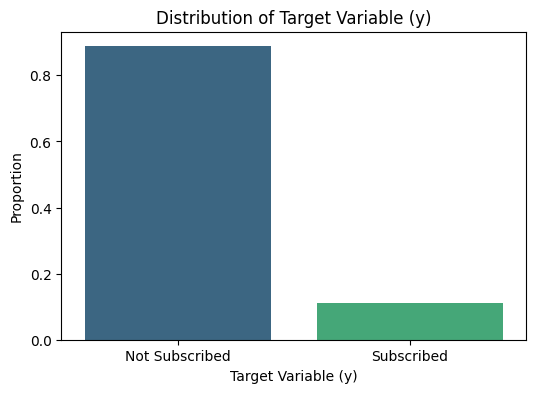

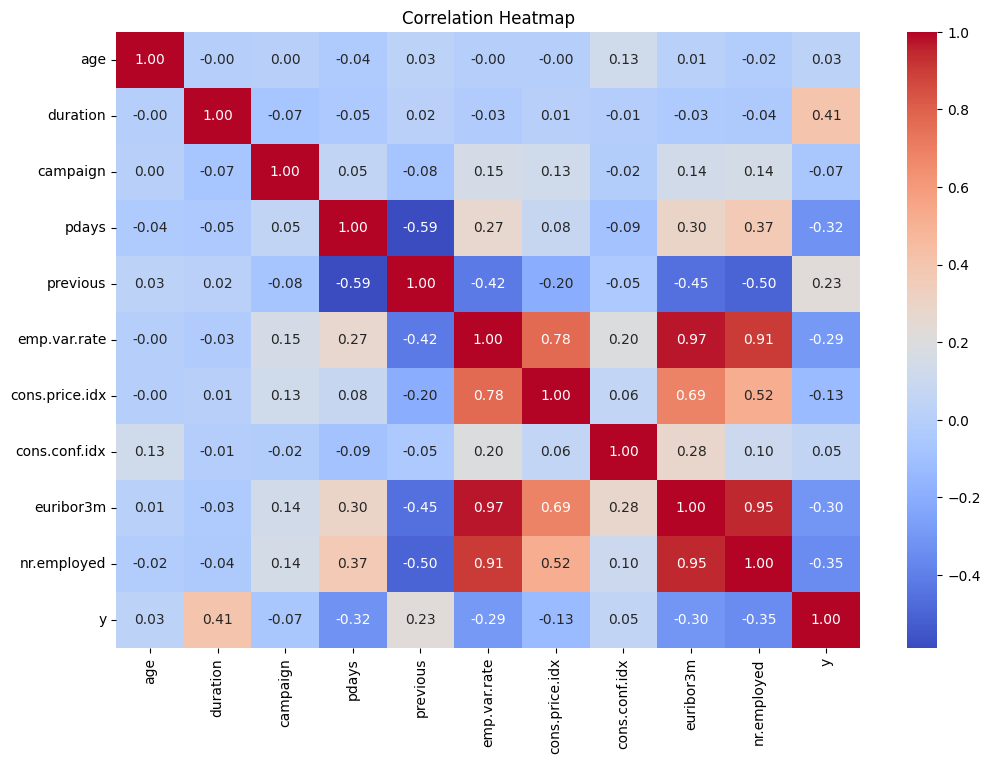

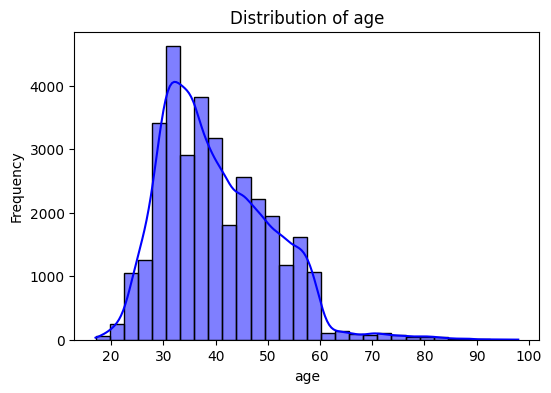

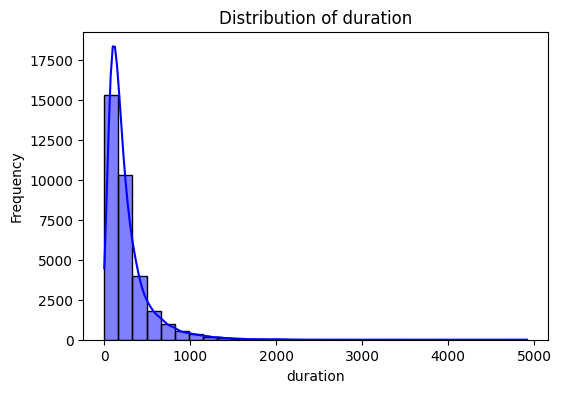

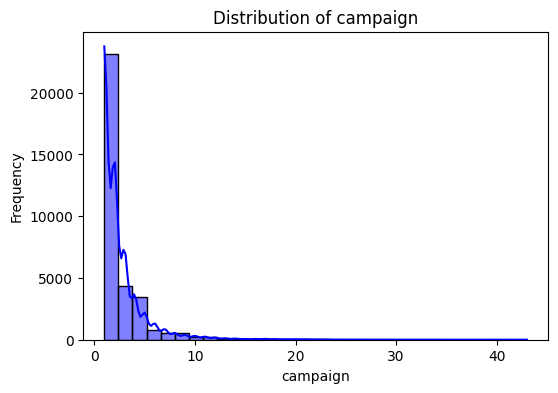

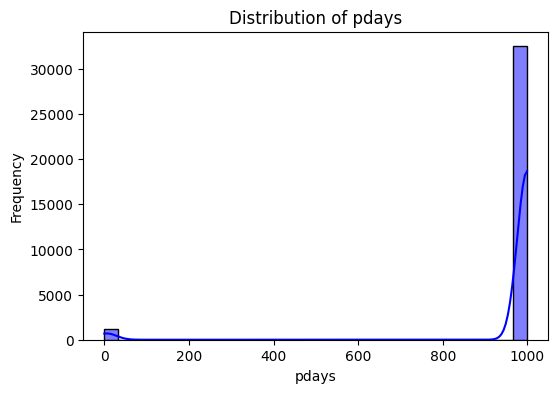

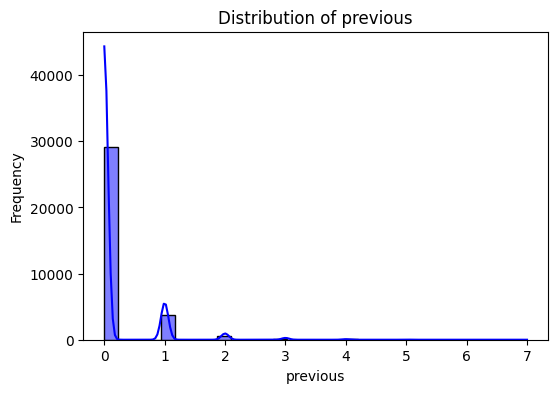

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




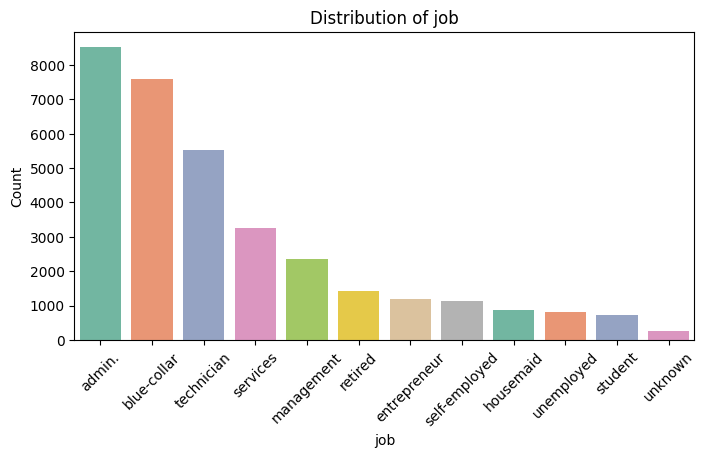

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




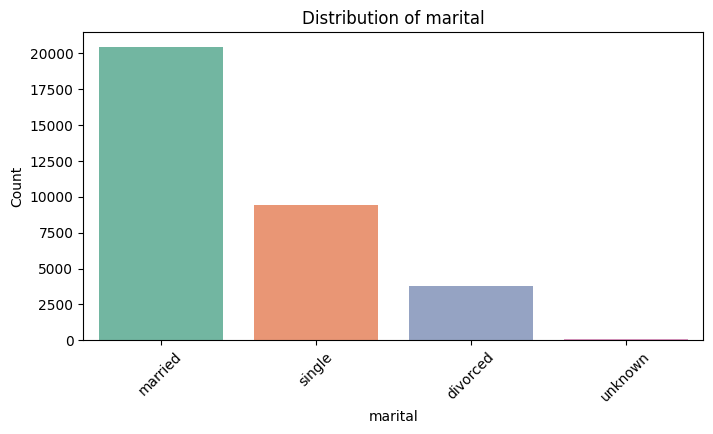

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




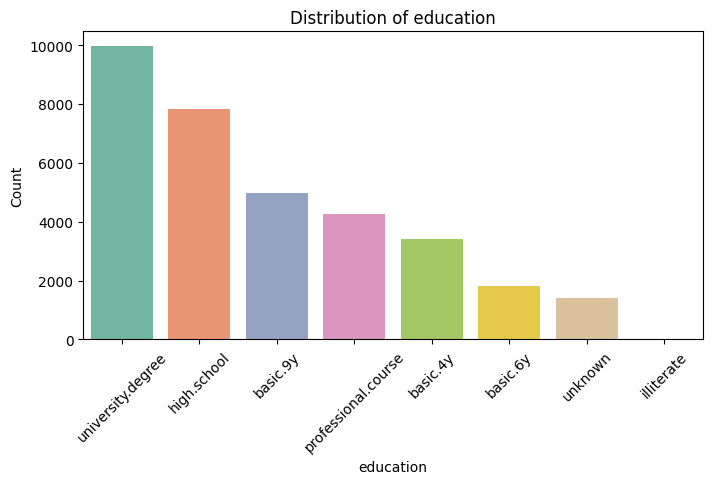

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




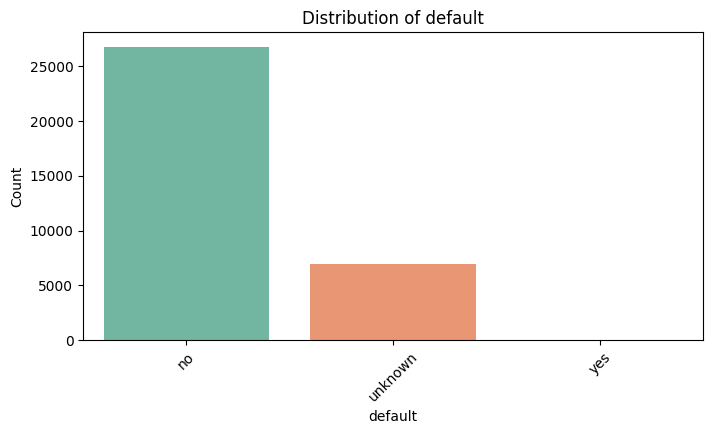

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




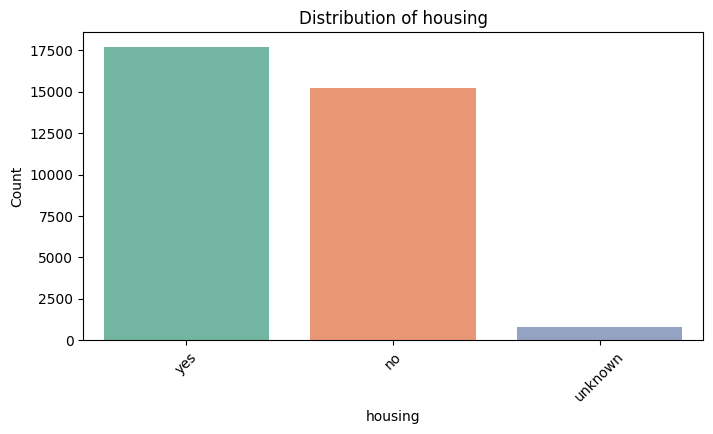

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




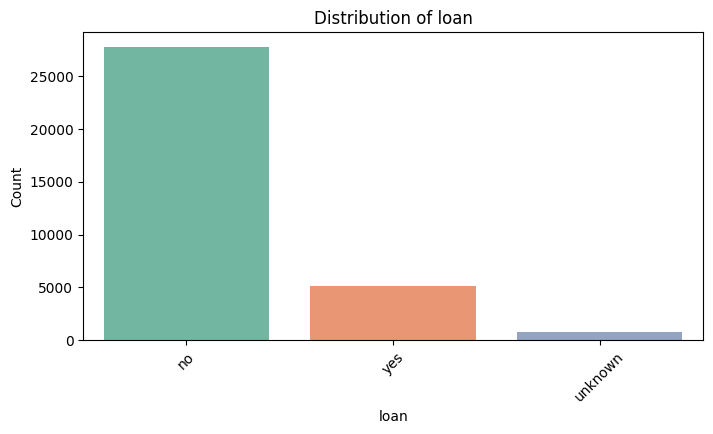

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




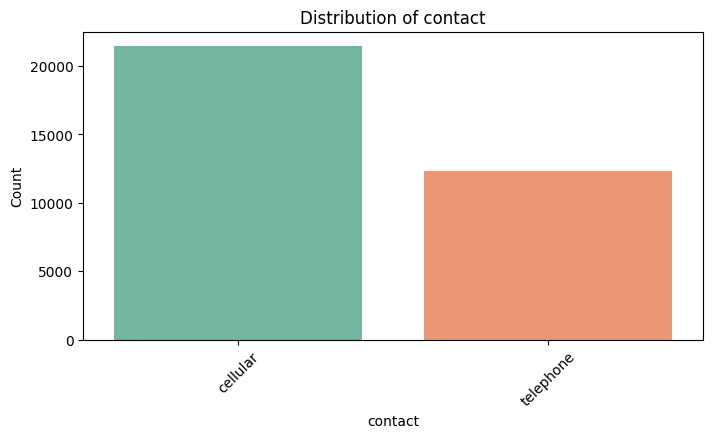

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




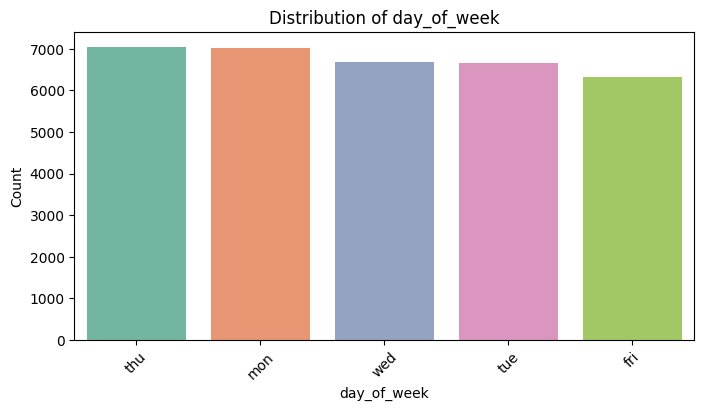

<ipython-input-61-bad34b0dd356>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




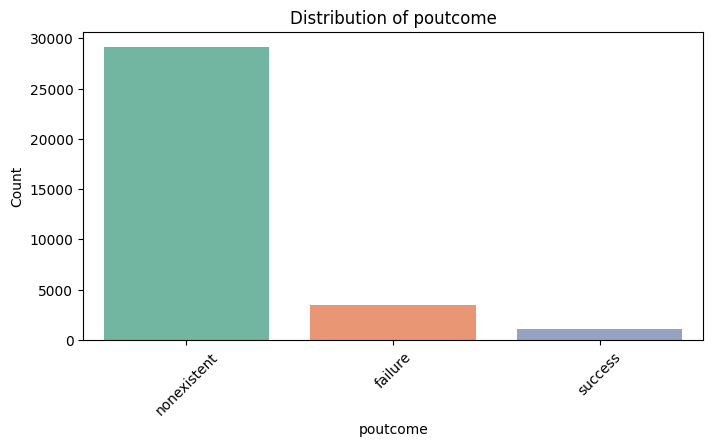

In [61]:

# Check the distribution of the target variable
target_distribution = train_data['y'].value_counts(normalize=True)

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Target Variable (y)")
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.show()

# Summary of numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['user_id'])
numerical_summary = numerical_features.describe()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots for some key features
key_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Categorical feature distribution
categorical_features = train_data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=feature, order=train_data[feature].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         33744 non-null  int64  
 1   age             33744 non-null  int64  
 2   job             33744 non-null  object 
 3   marital         33744 non-null  object 
 4   education       33744 non-null  object 
 5   default         33744 non-null  object 
 6   housing         33744 non-null  object 
 7   loan            33744 non-null  object 
 8   contact         33744 non-null  object 
 9   day_of_week     33744 non-null  object 
 10  duration        33744 non-null  int64  
 11  campaign        33744 non-null  int64  
 12  pdays           33744 non-null  int64  
 13  previous        33744 non-null  int64  
 14  poutcome        33744 non-null  object 
 15  emp.var.rate    33744 non-null  float64
 16  cons.price.idx  33744 non-null  float64
 17  cons.conf.idx   33744 non-null 

In [62]:
# Drop 'user_id' and 'duration' columns from train_data and test_data
train_data = train_data.drop(columns=['user_id', 'duration', 'previous', 'pdays'])
test_data = test_data.drop(columns=['previous', 'pdays'])

# Confirm the columns were removed
print("Columns in train_data after drop:", train_data.columns)
print("Columns in test_data after drop:", test_data.columns)

Columns in train_data after drop: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Columns in test_data after drop: Index(['user_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day_of_week', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')


In [63]:
train_data.shape

(33744, 17)

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33744 non-null  int64  
 1   job             33744 non-null  object 
 2   marital         33744 non-null  object 
 3   education       33744 non-null  object 
 4   default         33744 non-null  object 
 5   housing         33744 non-null  object 
 6   loan            33744 non-null  object 
 7   contact         33744 non-null  object 
 8   day_of_week     33744 non-null  object 
 9   campaign        33744 non-null  int64  
 10  poutcome        33744 non-null  object 
 11  emp.var.rate    33744 non-null  float64
 12  cons.price.idx  33744 non-null  float64
 13  cons.conf.idx   33744 non-null  float64
 14  euribor3m       33744 non-null  float64
 15  nr.employed     33744 non-null  float64
 16  y               33744 non-null  int64  
dtypes: float64(5), int64(3), object

In [65]:
test_data.shape

(8237, 17)

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         8237 non-null   int64  
 1   age             8237 non-null   int64  
 2   job             8237 non-null   object 
 3   marital         8237 non-null   object 
 4   education       8237 non-null   object 
 5   default         8237 non-null   object 
 6   housing         8237 non-null   object 
 7   loan            8237 non-null   object 
 8   contact         8237 non-null   object 
 9   day_of_week     8237 non-null   object 
 10  campaign        8237 non-null   int64  
 11  poutcome        8237 non-null   object 
 12  emp.var.rate    8237 non-null   float64
 13  cons.price.idx  8237 non-null   float64
 14  cons.conf.idx   8237 non-null   float64
 15  euribor3m       8237 non-null   float64
 16  nr.employed     8237 non-null   float64
dtypes: float64(5), int64(3), object(9

In [67]:
numeric_columns =['age',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [68]:
# 外れ値を検出するカラムを格納するリスト
outlier_columns = []

# 数値カラムに対して外れ値を検出
for column in numeric_columns:
    # 四分位数を計算
    Q1 = train_data[column].quantile(0.25)  # 第1四分位数
    Q3 = train_data[column].quantile(0.75)  # 第3四分位数
    IQR = Q3 - Q1                           # 四分位範囲 (IQR)

    # 下限と上限を計算
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 外れ値の検出（Trueならカラム名を追加）
    if (train_data[column] < lower_bound).any() or (train_data[column] > upper_bound).any():
        outlier_columns.append(column)

# 外れ値があるカラムを表示
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['age', 'campaign', 'cons.conf.idx']


In [69]:
#　外れ値があるカラムを指定

outliers = ['age', 'campaign', 'cons.conf.idx']

# 修正済みデータを格納する新しいDataFrameを作成
train_data_fixed = train_data.copy()
test_data_fixed = test_data.copy()

for column in outliers:
    Q1 = train_data[column].quantile(0.25)  # 第1四分位数
    Q3 = train_data[column].quantile(0.75)  # 第3四分位数
    IQR = Q3 - Q1                           # 四分位範囲 (IQR)

    # 下限と上限を計算
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 外れ値を下限・上限でクリップ
    train_data_fixed[column] = train_data[column].clip(lower=lower_bound, upper=upper_bound)
    test_data_fixed[column] = test_data[column].clip(lower=lower_bound, upper=upper_bound)

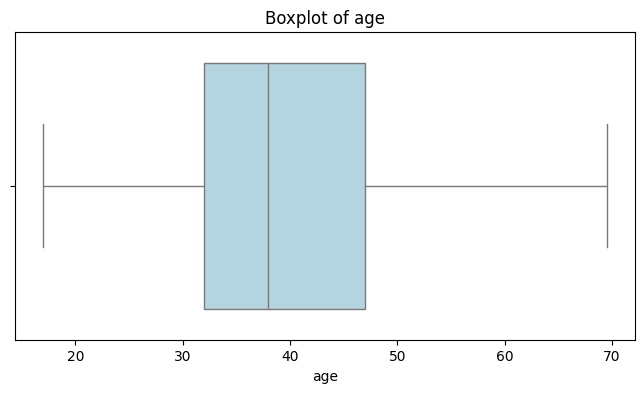

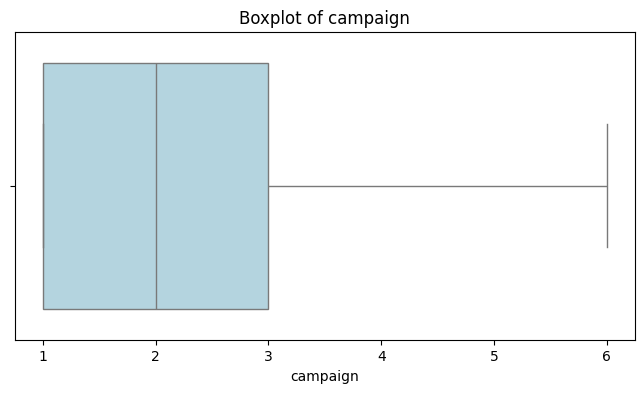

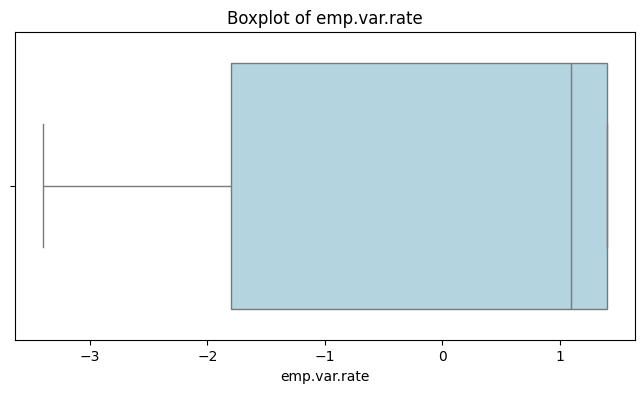

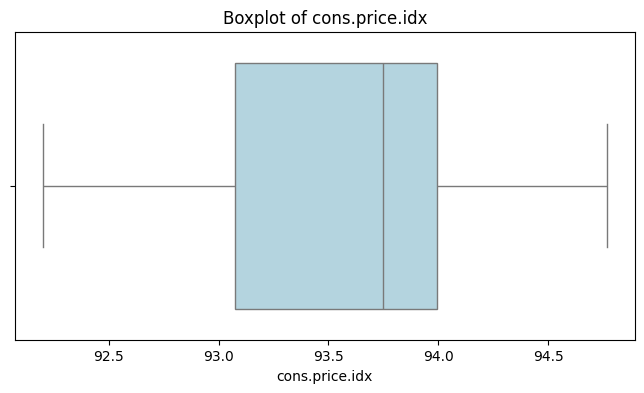

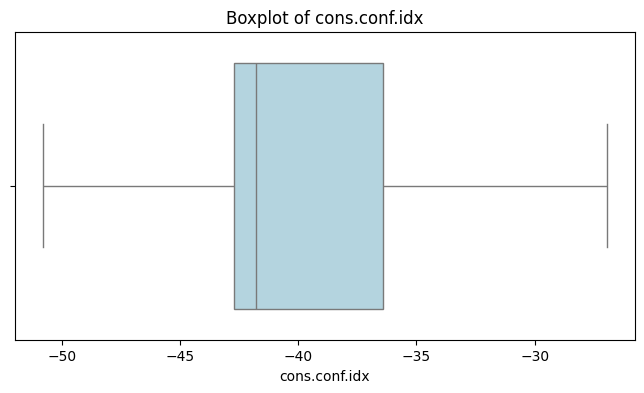

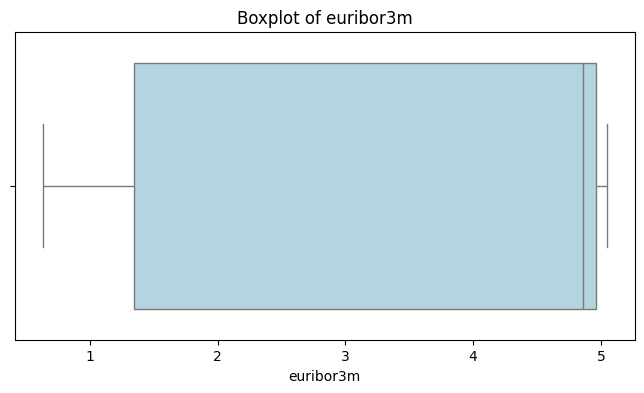

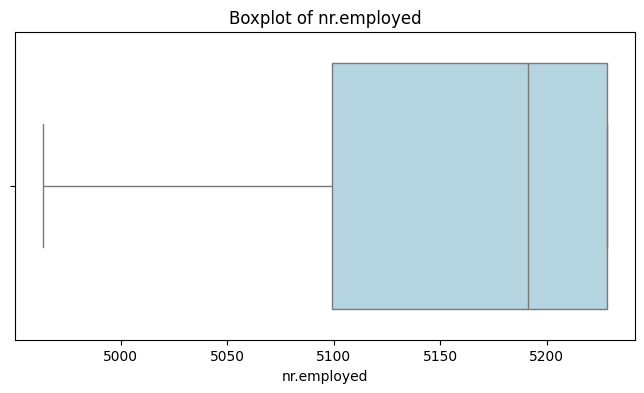

In [70]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_data_fixed, x=column, color='lightblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [71]:
train_data_fixed.shape

(33744, 17)

In [72]:
test_data_fixed.shape

(8237, 17)

In [73]:
train_data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33744 non-null  float64
 1   job             33744 non-null  object 
 2   marital         33744 non-null  object 
 3   education       33744 non-null  object 
 4   default         33744 non-null  object 
 5   housing         33744 non-null  object 
 6   loan            33744 non-null  object 
 7   contact         33744 non-null  object 
 8   day_of_week     33744 non-null  object 
 9   campaign        33744 non-null  int64  
 10  poutcome        33744 non-null  object 
 11  emp.var.rate    33744 non-null  float64
 12  cons.price.idx  33744 non-null  float64
 13  cons.conf.idx   33744 non-null  float64
 14  euribor3m       33744 non-null  float64
 15  nr.employed     33744 non-null  float64
 16  y               33744 non-null  int64  
dtypes: float64(6), int64(2), object

In [74]:
test_data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         8237 non-null   int64  
 1   age             8237 non-null   float64
 2   job             8237 non-null   object 
 3   marital         8237 non-null   object 
 4   education       8237 non-null   object 
 5   default         8237 non-null   object 
 6   housing         8237 non-null   object 
 7   loan            8237 non-null   object 
 8   contact         8237 non-null   object 
 9   day_of_week     8237 non-null   object 
 10  campaign        8237 non-null   int64  
 11  poutcome        8237 non-null   object 
 12  emp.var.rate    8237 non-null   float64
 13  cons.price.idx  8237 non-null   float64
 14  cons.conf.idx   8237 non-null   float64
 15  euribor3m       8237 non-null   float64
 16  nr.employed     8237 non-null   float64
dtypes: float64(6), int64(2), object(9

In [75]:
# One-Hot Encoding を適用するカテゴリ列を識別
categorical_columns = train_data_fixed.select_dtypes(include=['object']).columns
categorical_columns = test_data_fixed.select_dtypes(include=['object']).columns

# One-Hot Encoding を適用
train_data_encoded = pd.get_dummies(train_data_fixed, columns=categorical_columns, drop_first=True, dtype=int)
test_data_encoded = pd.get_dummies(test_data_fixed, columns=categorical_columns, drop_first=True, dtype=int)

# 結果を確認
print("One-Hot Encoding 後の train_data の列数:", train_data_encoded.shape[1])
print(train_data_encoded.head())

# 結果を確認
print("One-Hot Encoding 後の train_data の列数:", test_data_encoded.shape[1])
print(train_data_encoded.head())

One-Hot Encoding 後の train_data の列数: 42
    age  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  56.0         1           1.1          93.994          -36.4      4.857   
1  57.0         1           1.1          93.994          -36.4      4.857   
2  56.0         1           1.1          93.994          -36.4      4.857   
3  45.0         1           1.1          93.994          -36.4      4.857   
4  59.0         1           1.1          93.994          -36.4      4.857   

   nr.employed  y  job_blue-collar  job_entrepreneur  job_housemaid  \
0       5191.0  0                0                 0              1   
1       5191.0  0                0                 0              0   
2       5191.0  0                0                 0              0   
3       5191.0  0                0                 0              0   
4       5191.0  0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_st

In [76]:
train_data_encoded.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,57.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,56.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
3,45.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,59.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [77]:
test_data_encoded.head()

,user_id,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,33744,37.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1,33745,40.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,33746,25.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,33747,41.0,1,1.1,93.125,-35.4,1.806,5191.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
4,33748,37.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0


In [78]:
test_data_encoded.shape

(8237, 42)

In [79]:
train_data_encoded.shape

(33744, 42)

In [160]:
import pandas as pd
from scipy.stats import pointbiserialr

# Exitedと各数値特徴量の相関を計算
correlations = {}
for column in train_data_encoded.columns:
    corr, _ = pointbiserialr(train_data_encoded[column], train_data_encoded["y"])
    correlations[column] = corr

# 結果をソートして表示
correlations = pd.Series(correlations).sort_values(ascending=False)
print(correlations)

y                                1.000000
poutcome_success                 0.310148
job_student                      0.094655
job_retired                      0.091614
marital_single                   0.052870
cons.conf.idx                    0.052402
education_university.degree      0.047756
education_unknown                0.026502
age                              0.020820
job_unemployed                   0.013098
day_of_week_thu                  0.011871
education_illiterate             0.010290
day_of_week_tue                  0.009079
housing_yes                      0.007901
day_of_week_wed                  0.005958
marital_unknown                  0.002824
education_professional.course    0.000907
job_management                  -0.000137
loan_unknown                    -0.000343
housing_unknown                 -0.000343
job_unknown                     -0.001446
default_yes                     -0.002741
job_technician                  -0.005316
job_housemaid                   -0

In [80]:
train_data_encoded.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,57.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,56.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
3,45.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,59.0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [81]:
test_data_encoded.head()

,user_id,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,33744,37.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
1,33745,40.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,33746,25.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
3,33747,41.0,1,1.1,93.125,-35.4,1.806,5191.6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
4,33748,37.0,1,1.1,93.125,-35.4,1.806,5191.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0


In [82]:
# 不要な特徴量を定義
columns_to_drop = [
    'job_unknown',              # 職業が不明
    'marital_unknown',          # 配偶者情報が不明
    'education_illiterate',     # 非識字者（データ数が少ない可能性）
    'loan_yes',                 # ローン有無（低い相関）
    'housing_unknown',          # 住宅ローン情報が不明
    'loan_unknown',             # ローン情報が不明
    'default_yes',              # 延滞有無（低い相関）
    'contact_telephone'         # 電話接触（他特徴量と情報が重複）
]

# 不要な特徴量を除外
train_data_encoded = train_data_encoded.drop(columns=columns_to_drop)
test_data_encoded = test_data_encoded.drop(columns=columns_to_drop)

# 結果確認
print("Train data columns after dropping unnecessary features:")
print(train_data_encoded.columns)
print("\nTest data columns after dropping unnecessary features:")
print(test_data_encoded.columns)

Train data columns after dropping unnecessary features:
Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'housing_yes',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Test data columns after dropping unnecessary features:
Index(['user_id', 'age', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', '

In [19]:
train_data_columns_list = train_data_encoded.columns.tolist()
test_data_columns_list = test_data_encoded.columns.tolist()

# カラム名をリストで表示
print(train_data_columns_list)
print(test_data_columns_list)

['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'housing_yes', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.s

In [21]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            33744 non-null  float64
 1   campaign                       33744 non-null  int64  
 2   emp.var.rate                   33744 non-null  float64
 3   cons.price.idx                 33744 non-null  float64
 4   cons.conf.idx                  33744 non-null  float64
 5   euribor3m                      33744 non-null  float64
 6   nr.employed                    33744 non-null  float64
 7   y                              33744 non-null  int64  
 8   job_blue-collar                33744 non-null  int64  
 9   job_entrepreneur               33744 non-null  int64  
 10  job_housemaid                  33744 non-null  int64  
 11  job_management                 33744 non-null  int64  
 12  job_retired                    33744 non-null 

モデル

In [103]:

feature_cols = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'housing_yes', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
X_new = test_data_encoded[feature_cols]
X = train_data_encoded[feature_cols]
y = train_data_encoded['y']


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26995, 33) (26995,)
(6749, 33) (6749,)


In [87]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Optunaによるハイパーパラメータチューニング

In [86]:
params_base = {
  'objective': 'binary',
  'learning_rate': 0.05,
  'seed': 0,
  'bagging_freq': 1,
  'verbosity': -1,
  'metric': 'auc'
}

In [88]:
def objective(trial):
  params_tuning = {
      'num_leaves': trial.suggest_int('num_leaves', 8, 256),
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 200),
      'min_sum_hessian_in_leaf': trial.suggest_float('min_sum_hessian_in_leaf', 1e-5, 1e-2, log=True),
      'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1),
      'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1),
      'max_bin': trial.suggest_int('max_bin', 100, 400),
      'lambda_l1': trial.suggest_float('lambda_l1', 0.001, 1000, log=True),
      'lambda_l2': trial.suggest_float('lambda_l2', 0.001, 1000, log=True),
      'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.1, 3, log=True),
  }
  # 探索用ハイパーパラメータの設定
  params_tuning.update(params_base)

  # モデルの学習・評価
  metrics_list = []
  skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
  for fold in skf.split(X_train, y_train):
    idx_tr, idx_va = fold[0], fold[1]
    X_tr, y_tr = X_train.iloc[idx_tr, :], y_train[idx_tr]
    X_va, y_va = X_train.iloc[idx_va, :], y_train[idx_va]

    lgb_train = lgb.Dataset(X_tr, y_tr)
    lgb_eval = lgb.Dataset(X_va, y_va)
    # 探索用ハイパーパラメータで学習
    model = lgb.train(params_tuning,
                      lgb_train,
                      num_boost_round=100000,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=['train', 'valid'],
                      callbacks=[lgb.log_evaluation(1000),
                                 lgb.early_stopping(stopping_rounds=100)])
    y_va_pred = model.predict(X_va, num_iteration=model.best_iteration)
    metrics_list.append(roc_auc_score(y_va, y_va_pred))

    # 評価指標の算出
    score = np.mean(metrics_list)
    print('')

    return score

In [89]:
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=0), direction='maximize')
study.optimize(objective, n_trials=300)

[I 2025-01-24 02:52:14,449] A new study created in memory with name: no-name-ae72315c-36d8-4d13-90bc-e06eb6da1c4d


Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:17,295] Trial 0 finished with value: 0.7856119878098617 and parameters: {'num_leaves': 144, 'min_data_in_leaf': 145, 'min_sum_hessian_in_leaf': 0.0006431172050131992, 'bagging_fraction': 0.5903948646972071, 'feature_fraction': 0.4812893194050143, 'max_bin': 294, 'lambda_l1': 0.4222048983149828, 'lambda_l2': 224.2012371372442, 'min_gain_to_split': 2.65122597429743}. Best is trial 0 with value: 0.7856119878098617.


Early stopping, best iteration is:
[782]	train's auc: 0.788769	valid's auc: 0.785927

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:18,297] Trial 1 finished with value: 0.7952313018661236 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 160, 'min_sum_hessian_in_leaf': 0.0003860866271460546, 'bagging_fraction': 0.6112401049845391, 'feature_fraction': 0.933036974463395, 'max_bin': 121, 'lambda_l1': 0.003332543279005117, 'lambda_l2': 0.001322240284589594, 'min_gain_to_split': 1.6977763163336623}. Best is trial 1 with value: 0.7952313018661236.


Early stopping, best iteration is:
[139]	train's auc: 0.818112	valid's auc: 0.795231

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:22,522] Trial 2 finished with value: 0.7959090056166901 and parameters: {'num_leaves': 201, 'min_data_in_leaf': 175, 'min_sum_hessian_in_leaf': 0.008626905220714904, 'bagging_fraction': 0.8192427077950513, 'feature_fraction': 0.5153314260276387, 'max_bin': 334, 'lambda_l1': 0.005124441683726439, 'lambda_l2': 6.910765046043323, 'min_gain_to_split': 0.1628359108363256}. Best is trial 2 with value: 0.7959090056166901.


Early stopping, best iteration is:
[169]	train's auc: 0.850179	valid's auc: 0.795909

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:24,050] Trial 3 finished with value: 0.7951663436680528 and parameters: {'num_leaves': 243, 'min_data_in_leaf': 107, 'min_sum_hessian_in_leaf': 0.00017538232373118029, 'bagging_fraction': 0.3381000508941643, 'feature_fraction': 0.796810320490795, 'max_bin': 237, 'lambda_l1': 2.5739712587324886, 'lambda_l2': 0.0012963993440545018, 'min_gain_to_split': 0.8171890156969399}. Best is trial 2 with value: 0.7959090056166901.


Early stopping, best iteration is:
[236]	train's auc: 0.819589	valid's auc: 0.795166

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:26,909] Trial 4 finished with value: 0.7894668952997459 and parameters: {'num_leaves': 160, 'min_data_in_leaf': 125, 'min_sum_hessian_in_leaf': 0.006780227021579835, 'bagging_fraction': 0.7136382691931351, 'feature_fraction': 0.42355711051640743, 'max_bin': 231, 'lambda_l1': 15.338651335458607, 'lambda_l2': 0.0022980148444982753, 'min_gain_to_split': 0.965817982689216}. Best is trial 2 with value: 0.7959090056166901.


Early stopping, best iteration is:
[785]	train's auc: 0.794778	valid's auc: 0.789582

Training until validation scores don't improve for 100 rounds
[1000]	train's auc: 0.793756	valid's auc: 0.787865
Early stopping, best iteration is:
[1613]	train's auc: 0.798498	valid's auc: 0.789567


[I 2025-01-24 02:52:36,420] Trial 5 finished with value: 0.789540197319643 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 46, 'min_sum_hessian_in_leaf': 2.436570001464197e-05, 'bagging_fraction': 0.38388551583176544, 'feature_fraction': 0.42733969384836035, 'max_bin': 271, 'lambda_l1': 0.42816294681191575, 'lambda_l2': 851.614462778716, 'min_gain_to_split': 0.14149221941661935}. Best is trial 2 with value: 0.7959090056166901.



Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:37,519] Trial 6 finished with value: 0.7984334752648328 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.000910594402626528, 'bagging_fraction': 0.3279624422858039, 'feature_fraction': 0.5196796955706757, 'max_bin': 173, 'lambda_l1': 0.008991196763419824, 'lambda_l2': 0.004594633206288104, 'min_gain_to_split': 0.9321340801728937}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[104]	train's auc: 0.838921	valid's auc: 0.798433

Training until validation scores don't improve for 100 rounds
[1000]	train's auc: 0.790364	valid's auc: 0.785691
[2000]	train's auc: 0.793647	valid's auc: 0.788143
Early stopping, best iteration is:
[2853]	train's auc: 0.794747	valid's auc: 0.788736


[I 2025-01-24 02:52:49,601] Trial 7 finished with value: 0.7887238007084956 and parameters: {'num_leaves': 42, 'min_data_in_leaf': 43, 'min_sum_hessian_in_leaf': 0.00012769547619045506, 'bagging_fraction': 0.8388939068631416, 'feature_fraction': 0.18739114821375513, 'max_bin': 352, 'lambda_l1': 0.0037721629693531814, 'lambda_l2': 722.3651574885365, 'min_gain_to_split': 0.4923281304224349}. Best is trial 6 with value: 0.7984334752648328.



Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:51,250] Trial 8 finished with value: 0.7901157356074018 and parameters: {'num_leaves': 251, 'min_data_in_leaf': 123, 'min_sum_hessian_in_leaf': 0.00165116600355318, 'bagging_fraction': 0.1352690130288886, 'feature_fraction': 0.3545262663187686, 'max_bin': 136, 'lambda_l1': 0.0598192805074934, 'lambda_l2': 0.005156634070543801, 'min_gain_to_split': 0.29491693580715767}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[269]	train's auc: 0.81627	valid's auc: 0.790116

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:52,999] Trial 9 finished with value: 0.7971932125049043 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 17, 'min_sum_hessian_in_leaf': 0.001195133329709236, 'bagging_fraction': 0.6099413087859177, 'feature_fraction': 0.3388505418455009, 'max_bin': 257, 'lambda_l1': 0.0036613653276911986, 'lambda_l2': 2.8554790180743956, 'min_gain_to_split': 2.3587568009704403}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[405]	train's auc: 0.808496	valid's auc: 0.797759

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:53,277] Trial 10 finished with value: 0.5 and parameters: {'num_leaves': 13, 'min_data_in_leaf': 72, 'min_sum_hessian_in_leaf': 1.1542675973617432e-05, 'bagging_fraction': 0.11804125885700018, 'feature_fraction': 0.6880403570366223, 'max_bin': 172, 'lambda_l1': 131.7445973437284, 'lambda_l2': 0.04473937149215509, 'min_gain_to_split': 0.3935603776501378}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[1]	train's auc: 0.5	valid's auc: 0.5

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:55,798] Trial 11 finished with value: 0.7970302298518953 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 0.001675475583682167, 'bagging_fraction': 0.4007231528247682, 'feature_fraction': 0.2135592366825263, 'max_bin': 194, 'lambda_l1': 0.03773073775699558, 'lambda_l2': 1.2365567289968518, 'min_gain_to_split': 1.4162297925038438}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[539]	train's auc: 0.823033	valid's auc: 0.797542

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:52:57,429] Trial 12 finished with value: 0.7975914909334179 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 0.001561837058358087, 'bagging_fraction': 0.9701001517023972, 'feature_fraction': 0.6495975565358127, 'max_bin': 190, 'lambda_l1': 0.0013376803177385732, 'lambda_l2': 0.08376163543762424, 'min_gain_to_split': 2.817846508197405}. Best is trial 6 with value: 0.7984334752648328.


Early stopping, best iteration is:
[367]	train's auc: 0.810651	valid's auc: 0.797591

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:01,197] Trial 13 finished with value: 0.7997812188111031 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0042050174064293365, 'bagging_fraction': 0.9652844297268462, 'feature_fraction': 0.6626868195199149, 'max_bin': 179, 'lambda_l1': 0.03692186039170077, 'lambda_l2': 0.06676484099281625, 'min_gain_to_split': 1.2193442497244984}. Best is trial 13 with value: 0.7997812188111031.


Early stopping, best iteration is:
[158]	train's auc: 0.826777	valid's auc: 0.799851

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:02,560] Trial 14 finished with value: 0.7933548072404101 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 83, 'min_sum_hessian_in_leaf': 0.003762310593633368, 'bagging_fraction': 0.26922623680746594, 'feature_fraction': 0.6731101324017733, 'max_bin': 155, 'lambda_l1': 0.03584606918484102, 'lambda_l2': 0.048029863730005375, 'min_gain_to_split': 0.7970569025876393}. Best is trial 13 with value: 0.7997812188111031.


Early stopping, best iteration is:
[140]	train's auc: 0.83497	valid's auc: 0.793355

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:04,114] Trial 15 finished with value: 0.7955360058780061 and parameters: {'num_leaves': 12, 'min_data_in_leaf': 58, 'min_sum_hessian_in_leaf': 0.003729048832805278, 'bagging_fraction': 0.4700477673837008, 'feature_fraction': 0.8231248602680087, 'max_bin': 101, 'lambda_l1': 0.09920786488196168, 'lambda_l2': 0.015581435919054245, 'min_gain_to_split': 1.2211542794016241}. Best is trial 13 with value: 0.7997812188111031.


Early stopping, best iteration is:
[218]	train's auc: 0.832759	valid's auc: 0.795536

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:05,542] Trial 16 finished with value: 0.7957929337841716 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 87, 'min_sum_hessian_in_leaf': 0.0005309682671382945, 'bagging_fraction': 0.2368605873984618, 'feature_fraction': 0.5741792917811606, 'max_bin': 206, 'lambda_l1': 2.3580292530021256, 'lambda_l2': 0.25362337979323374, 'min_gain_to_split': 0.6855912285844997}. Best is trial 13 with value: 0.7997812188111031.


Early stopping, best iteration is:
[229]	train's auc: 0.815348	valid's auc: 0.795793



[I 2025-01-24 02:53:05,835] Trial 17 finished with value: 0.5 and parameters: {'num_leaves': 48, 'min_data_in_leaf': 200, 'min_sum_hessian_in_leaf': 8.937742658145868e-05, 'bagging_fraction': 0.9736488690581302, 'feature_fraction': 0.9874013503994072, 'max_bin': 157, 'lambda_l1': 891.5792891725475, 'lambda_l2': 26.073793926429705, 'min_gain_to_split': 0.2237253451675191}. Best is trial 13 with value: 0.7997812188111031.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's auc: 0.5	valid's auc: 0.5

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:06,965] Trial 18 finished with value: 0.7999302332883137 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.004067356393079142, 'bagging_fraction': 0.5025755791714213, 'feature_fraction': 0.7937114040306172, 'max_bin': 219, 'lambda_l1': 0.01771458071304411, 'lambda_l2': 0.2905309182067728, 'min_gain_to_split': 1.7394835204367578}. Best is trial 18 with value: 0.7999302332883137.


Early stopping, best iteration is:
[156]	train's auc: 0.829404	valid's auc: 0.79996

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:08,088] Trial 19 finished with value: 0.7975710331184211 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 62, 'min_sum_hessian_in_leaf': 0.0034923896310310406, 'bagging_fraction': 0.5048882322843309, 'feature_fraction': 0.7953040418410333, 'max_bin': 300, 'lambda_l1': 0.01905472944497131, 'lambda_l2': 0.3203133582002376, 'min_gain_to_split': 1.7439615193896705}. Best is trial 18 with value: 0.7999302332883137.


Early stopping, best iteration is:
[153]	train's auc: 0.823864	valid's auc: 0.797624

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:09,107] Trial 20 finished with value: 0.8000523003113297 and parameters: {'num_leaves': 179, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.008548486150136567, 'bagging_fraction': 0.7275365224865502, 'feature_fraction': 0.8749553143469708, 'max_bin': 387, 'lambda_l1': 0.20177259581844953, 'lambda_l2': 0.43067006508392347, 'min_gain_to_split': 1.9619162252832278}. Best is trial 20 with value: 0.8000523003113297.


Early stopping, best iteration is:
[148]	train's auc: 0.821428	valid's auc: 0.800144

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:10,131] Trial 21 finished with value: 0.7998449408874216 and parameters: {'num_leaves': 194, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.009920773946078055, 'bagging_fraction': 0.7303257190246439, 'feature_fraction': 0.8837201183312443, 'max_bin': 222, 'lambda_l1': 0.2682097196736491, 'lambda_l2': 0.32248408493108677, 'min_gain_to_split': 1.8482997982446236}. Best is trial 20 with value: 0.8000523003113297.


Early stopping, best iteration is:
[142]	train's auc: 0.821861	valid's auc: 0.799893

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:10,649] Trial 22 finished with value: 0.7984091854724049 and parameters: {'num_leaves': 206, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.008934694100143269, 'bagging_fraction': 0.7120684318859902, 'feature_fraction': 0.8699494502628013, 'max_bin': 390, 'lambda_l1': 0.2251645859040495, 'lambda_l2': 0.3879294471955316, 'min_gain_to_split': 1.9966841779873616}. Best is trial 20 with value: 0.8000523003113297.


Early stopping, best iteration is:
[9]	train's auc: 0.806938	valid's auc: 0.798409

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:14,537] Trial 23 finished with value: 0.7962485682619808 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.009749164882930856, 'bagging_fraction': 0.7429681795232428, 'feature_fraction': 0.926750917413119, 'max_bin': 228, 'lambda_l1': 1.7768726051881076, 'lambda_l2': 12.597968981498152, 'min_gain_to_split': 1.985950001388444}. Best is trial 20 with value: 0.8000523003113297.


Early stopping, best iteration is:
[208]	train's auc: 0.807509	valid's auc: 0.796398

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:17,440] Trial 24 finished with value: 0.7906245233205493 and parameters: {'num_leaves': 224, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 0.0025499896261416055, 'bagging_fraction': 0.8412844826277487, 'feature_fraction': 0.7474671328672018, 'max_bin': 280, 'lambda_l1': 11.701383121132263, 'lambda_l2': 1.1002365498064757, 'min_gain_to_split': 1.3502270247722157}. Best is trial 20 with value: 0.8000523003113297.


Early stopping, best iteration is:
[811]	train's auc: 0.797081	valid's auc: 0.79071

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:18,326] Trial 25 finished with value: 0.8019618611939107 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.005365483363413514, 'bagging_fraction': 0.532188234248335, 'feature_fraction': 0.8825892054730449, 'max_bin': 325, 'lambda_l1': 0.624360115666364, 'lambda_l2': 0.19747774875088392, 'min_gain_to_split': 0.10152181261673461}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[10]	train's auc: 0.82872	valid's auc: 0.801962

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:20,696] Trial 26 finished with value: 0.7953575098970088 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 0.0025363549792451665, 'bagging_fraction': 0.5000265919936812, 'feature_fraction': 0.9758231541507303, 'max_bin': 398, 'lambda_l1': 9.662065432286768, 'lambda_l2': 3.189833032296033, 'min_gain_to_split': 0.5374138873573532}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[459]	train's auc: 0.808253	valid's auc: 0.795403

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:21,845] Trial 27 finished with value: 0.7927848933066232 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 99, 'min_sum_hessian_in_leaf': 0.005675092359359072, 'bagging_fraction': 0.6500451346490833, 'feature_fraction': 0.8499925420374167, 'max_bin': 357, 'lambda_l1': 0.13955283111819575, 'lambda_l2': 0.01729458587525234, 'min_gain_to_split': 0.10565168215039597}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[56]	train's auc: 0.858799	valid's auc: 0.792785

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:22,624] Trial 28 finished with value: 0.7989313233004747 and parameters: {'num_leaves': 126, 'min_data_in_leaf': 18, 'min_sum_hessian_in_leaf': 5.4338751673326976e-05, 'bagging_fraction': 0.5429085509019006, 'feature_fraction': 0.7526251099975289, 'max_bin': 320, 'lambda_l1': 0.9927957291017109, 'lambda_l2': 0.14272764534673837, 'min_gain_to_split': 0.3454517567375392}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[15]	train's auc: 0.815517	valid's auc: 0.798931

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:27,090] Trial 29 finished with value: 0.7963450475647289 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 59, 'min_sum_hessian_in_leaf': 0.005757997167250657, 'bagging_fraction': 0.5708282521764365, 'feature_fraction': 0.598528591507355, 'max_bin': 377, 'lambda_l1': 0.6120110136848188, 'lambda_l2': 40.189477411028896, 'min_gain_to_split': 0.21442855276835104}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[241]	train's auc: 0.827631	valid's auc: 0.796345

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:28,558] Trial 30 finished with value: 0.7969374589144033 and parameters: {'num_leaves': 175, 'min_data_in_leaf': 43, 'min_sum_hessian_in_leaf': 0.000662948552676134, 'bagging_fraction': 0.4527210190174645, 'feature_fraction': 0.7269114699150968, 'max_bin': 308, 'lambda_l1': 0.011759734515450978, 'lambda_l2': 0.7571971407987725, 'min_gain_to_split': 2.7866956406508128}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[248]	train's auc: 0.810747	valid's auc: 0.79761

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:29,621] Trial 31 finished with value: 0.7983186395540666 and parameters: {'num_leaves': 224, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.0025410748364651766, 'bagging_fraction': 0.6615225564007831, 'feature_fraction': 0.9015672788658771, 'max_bin': 213, 'lambda_l1': 0.25492799207679223, 'lambda_l2': 0.6052447242565409, 'min_gain_to_split': 2.2982780990400578}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[169]	train's auc: 0.816101	valid's auc: 0.798468

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:30,733] Trial 32 finished with value: 0.7974269631282187 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 22, 'min_sum_hessian_in_leaf': 0.005720189749955461, 'bagging_fraction': 0.7780150265502762, 'feature_fraction': 0.9137938045763987, 'max_bin': 258, 'lambda_l1': 4.326728630834907, 'lambda_l2': 0.15111313886509617, 'min_gain_to_split': 1.6272187953042851}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[197]	train's auc: 0.80698	valid's auc: 0.797658

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:31,613] Trial 33 finished with value: 0.8007063941364319 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.009931854668963689, 'bagging_fraction': 0.646422451877368, 'feature_fraction': 0.9944622646522409, 'max_bin': 339, 'lambda_l1': 0.11641577876181777, 'lambda_l2': 2.5059401882575685, 'min_gain_to_split': 1.0451537670592543}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[66]	train's auc: 0.83123	valid's auc: 0.800706

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:32,878] Trial 34 finished with value: 0.7998221962471839 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 53, 'min_sum_hessian_in_leaf': 0.005012081904016382, 'bagging_fraction': 0.6544800048808807, 'feature_fraction': 0.9711805112184907, 'max_bin': 343, 'lambda_l1': 0.8374390735033944, 'lambda_l2': 3.948208006883439, 'min_gain_to_split': 0.6743998185460615}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[142]	train's auc: 0.842073	valid's auc: 0.799822

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:33,762] Trial 35 finished with value: 0.7983413841943046 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 72, 'min_sum_hessian_in_leaf': 0.00038479618063448834, 'bagging_fraction': 0.5888937320365587, 'feature_fraction': 0.8079077208588087, 'max_bin': 370, 'lambda_l1': 0.0936902486658773, 'lambda_l2': 2.0524142768927462, 'min_gain_to_split': 1.0480437871373784}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[66]	train's auc: 0.822592	valid's auc: 0.798341

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:36,249] Trial 36 finished with value: 0.7936221803753805 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 152, 'min_sum_hessian_in_leaf': 0.002658697451522003, 'bagging_fraction': 0.553860435638145, 'feature_fraction': 0.9944686794684489, 'max_bin': 336, 'lambda_l1': 0.01950842563745939, 'lambda_l2': 74.06959970021528, 'min_gain_to_split': 1.40973760731749}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[566]	train's auc: 0.806206	valid's auc: 0.793701

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:38,397] Trial 37 finished with value: 0.8012047366207744 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.007859108411616264, 'bagging_fraction': 0.8993726319953466, 'feature_fraction': 0.9299206725456557, 'max_bin': 323, 'lambda_l1': 0.0015686029262426062, 'lambda_l2': 0.02705339560057999, 'min_gain_to_split': 1.097818658361546}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[21]	train's auc: 0.828543	valid's auc: 0.801205

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:40,349] Trial 38 finished with value: 0.8008043567852824 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.00024824767413092214, 'bagging_fraction': 0.8641922550400323, 'feature_fraction': 0.9428495891724813, 'max_bin': 322, 'lambda_l1': 0.001955281689050595, 'lambda_l2': 0.017621599967985936, 'min_gain_to_split': 1.043236281928665}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[32]	train's auc: 0.834056	valid's auc: 0.800804

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:41,206] Trial 39 finished with value: 0.7987984402121283 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 114, 'min_sum_hessian_in_leaf': 0.0002122011254474142, 'bagging_fraction': 0.9158799564273405, 'feature_fraction': 0.9524789353747964, 'max_bin': 322, 'lambda_l1': 0.002168318809747971, 'lambda_l2': 0.029631159994103814, 'min_gain_to_split': 0.6496489064421049}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[56]	train's auc: 0.838257	valid's auc: 0.798798

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:43,065] Trial 40 finished with value: 0.7952355046800806 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.00026977756581437155, 'bagging_fraction': 0.8930433127203329, 'feature_fraction': 0.1106076410411736, 'max_bin': 287, 'lambda_l1': 0.0011279039415764405, 'lambda_l2': 0.009450504394734703, 'min_gain_to_split': 1.00341097110456}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[442]	train's auc: 0.812649	valid's auc: 0.795277

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:43,965] Trial 41 finished with value: 0.7995765170489622 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.006904372192600188, 'bagging_fraction': 0.7990317497355757, 'feature_fraction': 0.9370761216470731, 'max_bin': 365, 'lambda_l1': 0.008587266784134188, 'lambda_l2': 0.0020872640591811857, 'min_gain_to_split': 0.4518012598097341}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[31]	train's auc: 0.861254	valid's auc: 0.799577

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:44,842] Trial 42 finished with value: 0.7997456185046437 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.0001451149998449403, 'bagging_fraction': 0.8738776462540412, 'feature_fraction': 0.8595353710138728, 'max_bin': 318, 'lambda_l1': 0.0027205024273876444, 'lambda_l2': 7.813955502619224, 'min_gain_to_split': 0.8279189122398215}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[72]	train's auc: 0.825377	valid's auc: 0.799746

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:45,836] Trial 43 finished with value: 0.7988871319478387 and parameters: {'num_leaves': 139, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 0.006728652186618275, 'bagging_fraction': 0.7811943991163843, 'feature_fraction': 0.9038074750903785, 'max_bin': 345, 'lambda_l1': 0.4737550020418763, 'lambda_l2': 0.005531770282541501, 'min_gain_to_split': 1.0747443510428465}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[113]	train's auc: 0.848493	valid's auc: 0.798968

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:46,602] Trial 44 finished with value: 0.7828720621403349 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 65, 'min_sum_hessian_in_leaf': 7.262817757345931e-05, 'bagging_fraction': 0.9270237122381734, 'feature_fraction': 0.8485934830285685, 'max_bin': 329, 'lambda_l1': 60.13598804690503, 'lambda_l2': 0.024211527721277402, 'min_gain_to_split': 0.8762077911535369}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[160]	train's auc: 0.785234	valid's auc: 0.782943

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:47,372] Trial 45 finished with value: 0.7978475535543569 and parameters: {'num_leaves': 27, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 0.0008880166480024774, 'bagging_fraction': 0.6876443942615497, 'feature_fraction': 0.9995948450008388, 'max_bin': 387, 'lambda_l1': 0.005728480652202392, 'lambda_l2': 0.12167658757469475, 'min_gain_to_split': 0.10420443473423081}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[36]	train's auc: 0.823176	valid's auc: 0.797848

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:48,354] Trial 46 finished with value: 0.7974567536624433 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.007554526528947545, 'bagging_fraction': 0.8513729699997973, 'feature_fraction': 0.9544472930966519, 'max_bin': 302, 'lambda_l1': 6.237588044814841, 'lambda_l2': 0.01104952036611573, 'min_gain_to_split': 1.2137731367995892}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[151]	train's auc: 0.806012	valid's auc: 0.797504

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:49,571] Trial 47 finished with value: 0.795637367861675 and parameters: {'num_leaves': 173, 'min_data_in_leaf': 132, 'min_sum_hessian_in_leaf': 3.522092003787891e-05, 'bagging_fraction': 0.6289726077059484, 'feature_fraction': 0.9382551579878115, 'max_bin': 356, 'lambda_l1': 1.5339155322888114, 'lambda_l2': 0.039813159350400924, 'min_gain_to_split': 2.236293367936474}. Best is trial 25 with value: 0.8019618611939107.


Early stopping, best iteration is:
[224]	train's auc: 0.808579	valid's auc: 0.796019

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:53,122] Trial 48 finished with value: 0.8020510473783218 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.0018667180255090977, 'bagging_fraction': 0.7464655818832753, 'feature_fraction': 0.48158572477319833, 'max_bin': 276, 'lambda_l1': 0.05872352736074066, 'lambda_l2': 0.086105731433063, 'min_gain_to_split': 0.5845126035056095}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[58]	train's auc: 0.850703	valid's auc: 0.802051

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:53,942] Trial 49 finished with value: 0.799695308349335 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 85, 'min_sum_hessian_in_leaf': 0.0017707156509164845, 'bagging_fraction': 0.9984598726610207, 'feature_fraction': 0.41648744102310736, 'max_bin': 267, 'lambda_l1': 0.06651932609143445, 'lambda_l2': 0.0011348793386060114, 'min_gain_to_split': 0.5645165845272969}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[65]	train's auc: 0.834661	valid's auc: 0.799695

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:55,343] Trial 50 finished with value: 0.797810964350496 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 96, 'min_sum_hessian_in_leaf': 0.001204202705129451, 'bagging_fraction': 0.8165608712734238, 'feature_fraction': 0.4850710587477015, 'max_bin': 248, 'lambda_l1': 0.004005039158163332, 'lambda_l2': 0.07941349019507951, 'min_gain_to_split': 0.26891968481964174}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[138]	train's auc: 0.867606	valid's auc: 0.797811

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:56,200] Trial 51 finished with value: 0.7998731862694564 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.00459514574628852, 'bagging_fraction': 0.7418485210074448, 'feature_fraction': 0.6123214470660837, 'max_bin': 310, 'lambda_l1': 0.16973510962356933, 'lambda_l2': 0.17103659962995788, 'min_gain_to_split': 0.3910632740686624}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[31]	train's auc: 0.837185	valid's auc: 0.799873

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:58,092] Trial 52 finished with value: 0.7991376938269812 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 49, 'min_sum_hessian_in_leaf': 0.007927231061994451, 'bagging_fraction': 0.612140536723219, 'feature_fraction': 0.2830796357022817, 'max_bin': 285, 'lambda_l1': 0.0019691015812058487, 'lambda_l2': 0.060197780006077076, 'min_gain_to_split': 0.7518367143759631}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[261]	train's auc: 0.840965	valid's auc: 0.799154

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:58,937] Trial 53 finished with value: 0.8006229559181678 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 0.0031835503775753974, 'bagging_fraction': 0.6883263233518929, 'feature_fraction': 0.546791232602314, 'max_bin': 332, 'lambda_l1': 0.055184480092069846, 'lambda_l2': 1.5194678401059216, 'min_gain_to_split': 0.1562830526713434}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.82935	valid's auc: 0.800623

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:53:59,772] Trial 54 finished with value: 0.799831961609025 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 0.00046326184165122264, 'bagging_fraction': 0.6845293235666555, 'feature_fraction': 0.5395371006266851, 'max_bin': 342, 'lambda_l1': 0.03703388874490765, 'lambda_l2': 1.5362168325724797, 'min_gain_to_split': 0.14239608945120685}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.829576	valid's auc: 0.799832

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:01,215] Trial 55 finished with value: 0.7966819525482526 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 177, 'min_sum_hessian_in_leaf': 0.0030979357057259707, 'bagging_fraction': 0.7629643990646104, 'feature_fraction': 0.439264216571593, 'max_bin': 296, 'lambda_l1': 0.007411576732443535, 'lambda_l2': 4.999739221666492, 'min_gain_to_split': 0.11879065386819357}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[157]	train's auc: 0.846448	valid's auc: 0.796682

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:01,970] Trial 56 finished with value: 0.7991212534076786 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.0002586302535410813, 'bagging_fraction': 0.9374445708170889, 'feature_fraction': 0.47973139450111685, 'max_bin': 333, 'lambda_l1': 0.060831435606020876, 'lambda_l2': 0.6221203763355415, 'min_gain_to_split': 0.1640203987308492}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[4]	train's auc: 0.834881	valid's auc: 0.799121

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:03,168] Trial 57 finished with value: 0.7954797005321999 and parameters: {'num_leaves': 136, 'min_data_in_leaf': 67, 'min_sum_hessian_in_leaf': 0.0018990751293417776, 'bagging_fraction': 0.6976443228075112, 'feature_fraction': 0.6307002243787894, 'max_bin': 275, 'lambda_l1': 0.02120669600346293, 'lambda_l2': 0.0046478400258278514, 'min_gain_to_split': 0.17185794264523604}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[38]	train's auc: 0.851058	valid's auc: 0.79548

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:06,756] Trial 58 finished with value: 0.7986628994620151 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 0.0011208924572311497, 'bagging_fraction': 0.8188518474447813, 'feature_fraction': 0.5652874696843808, 'max_bin': 319, 'lambda_l1': 0.3325301360445607, 'lambda_l2': 10.21678726809982, 'min_gain_to_split': 0.13167786907055082}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[69]	train's auc: 0.837405	valid's auc: 0.798663

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:07,579] Trial 59 finished with value: 0.7969946913515237 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.0031613798668718505, 'bagging_fraction': 0.8794726405110391, 'feature_fraction': 0.698551516876198, 'max_bin': 351, 'lambda_l1': 0.014072248465522567, 'lambda_l2': 0.10171097974536572, 'min_gain_to_split': 0.1884946183571395}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[12]	train's auc: 0.840603	valid's auc: 0.796995

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:08,974] Trial 60 finished with value: 0.7980269766266682 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 54, 'min_sum_hessian_in_leaf': 0.004500401329528886, 'bagging_fraction': 0.413330240426319, 'feature_fraction': 0.38244543189902513, 'max_bin': 327, 'lambda_l1': 0.08116204244334946, 'lambda_l2': 0.007600315336091966, 'min_gain_to_split': 0.5670833165424499}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[128]	train's auc: 0.84782	valid's auc: 0.798027

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:10,083] Trial 61 finished with value: 0.8014555457242671 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.009392284452649781, 'bagging_fraction': 0.7349830152961068, 'feature_fraction': 0.5062708218047165, 'max_bin': 380, 'lambda_l1': 0.12515623572543635, 'lambda_l2': 0.46473099999898165, 'min_gain_to_split': 1.1653510457641356}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[142]	train's auc: 0.834124	valid's auc: 0.801456

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:10,893] Trial 62 finished with value: 0.8000513732200156 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.009893071176111854, 'bagging_fraction': 0.5344469733375476, 'feature_fraction': 0.5001090017327255, 'max_bin': 375, 'lambda_l1': 0.13148549952478958, 'lambda_l2': 0.23760720689911835, 'min_gain_to_split': 1.1326550396645005}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[62]	train's auc: 0.826333	valid's auc: 0.800051

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:11,718] Trial 63 finished with value: 0.797641739282639 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.006574555132977109, 'bagging_fraction': 0.6166946427270571, 'feature_fraction': 0.5238947064676955, 'max_bin': 241, 'lambda_l1': 0.029882173148458067, 'lambda_l2': 1.6846898375333481, 'min_gain_to_split': 0.9244426369659642}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[60]	train's auc: 0.824021	valid's auc: 0.797642

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:12,864] Trial 64 finished with value: 0.7994025947184473 and parameters: {'num_leaves': 103, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 0.005369430186304345, 'bagging_fraction': 0.7672652357679659, 'feature_fraction': 0.44074851307499935, 'max_bin': 365, 'lambda_l1': 0.001646509176651294, 'lambda_l2': 0.028057161514080095, 'min_gain_to_split': 1.5253511956283008}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[179]	train's auc: 0.831714	valid's auc: 0.799657

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:13,639] Trial 65 finished with value: 0.7968181731653295 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 0.00377334627797135, 'bagging_fraction': 0.6665953081080978, 'feature_fraction': 0.563770524773042, 'max_bin': 313, 'lambda_l1': 0.5100576612227335, 'lambda_l2': 1.0449766106614973, 'min_gain_to_split': 1.2457111883214076}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[62]	train's auc: 0.817666	valid's auc: 0.796818

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:15,008] Trial 66 finished with value: 0.7991192756128754 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.007780245193167884, 'bagging_fraction': 0.8530851187054959, 'feature_fraction': 0.3253899823381715, 'max_bin': 290, 'lambda_l1': 0.0010071083644459455, 'lambda_l2': 2.302470945166324, 'min_gain_to_split': 0.9077339448302297}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[225]	train's auc: 0.8289	valid's auc: 0.799277

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:16,930] Trial 67 finished with value: 0.7969289914804016 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 57, 'min_sum_hessian_in_leaf': 0.00017509300604432942, 'bagging_fraction': 0.7224868101868949, 'feature_fraction': 0.45524378513545916, 'max_bin': 300, 'lambda_l1': 0.11026316857541173, 'lambda_l2': 0.4838885259057538, 'min_gain_to_split': 0.2876610454269534}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[65]	train's auc: 0.853622	valid's auc: 0.796929

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:20,081] Trial 68 finished with value: 0.7965953622195209 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 1.1248760136884612e-05, 'bagging_fraction': 0.5870059680512952, 'feature_fraction': 0.3821621597638113, 'max_bin': 351, 'lambda_l1': 0.005042145812305229, 'lambda_l2': 0.0162004872090003, 'min_gain_to_split': 0.7695799430073713}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[172]	train's auc: 0.860466	valid's auc: 0.796595

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:20,903] Trial 69 finished with value: 0.799626950816446 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 18, 'min_sum_hessian_in_leaf': 0.0006797783073842872, 'bagging_fraction': 0.6386309199363203, 'feature_fraction': 0.5922926190168158, 'max_bin': 335, 'lambda_l1': 0.05210611727229993, 'lambda_l2': 0.8308237608732533, 'min_gain_to_split': 0.6223180148023861}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[34]	train's auc: 0.828397	valid's auc: 0.799627

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:21,909] Trial 70 finished with value: 0.794548468210286 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 0.002016623598875089, 'bagging_fraction': 0.17416214042827177, 'feature_fraction': 0.8235926290815904, 'max_bin': 395, 'lambda_l1': 0.32985636515153144, 'lambda_l2': 0.22176481462182732, 'min_gain_to_split': 0.45505168121260814}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[67]	train's auc: 0.823687	valid's auc: 0.794548

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:23,930] Trial 71 finished with value: 0.7991999943632848 and parameters: {'num_leaves': 176, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.008189833684181512, 'bagging_fraction': 0.7511021446731699, 'feature_fraction': 0.8902669340865716, 'max_bin': 380, 'lambda_l1': 0.18838354255397005, 'lambda_l2': 0.054988099610045756, 'min_gain_to_split': 2.4930941077519475}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[497]	train's auc: 0.816989	valid's auc: 0.799267

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:25,314] Trial 72 finished with value: 0.7979266035404011 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 77, 'min_sum_hessian_in_leaf': 0.005929531407569007, 'bagging_fraction': 0.7076084806521985, 'feature_fraction': 0.926036426757613, 'max_bin': 386, 'lambda_l1': 0.6916178387039221, 'lambda_l2': 0.41113250079466873, 'min_gain_to_split': 1.5319825390402046}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[241]	train's auc: 0.82405	valid's auc: 0.798451

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:25,895] Trial 73 finished with value: 0.7990308311015155 and parameters: {'num_leaves': 198, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.009844024837540682, 'bagging_fraction': 0.7870288167310707, 'feature_fraction': 0.9571414312252338, 'max_bin': 363, 'lambda_l1': 1.240143550913681, 'lambda_l2': 0.18413101999113113, 'min_gain_to_split': 1.306629212992919}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.807515	valid's auc: 0.799031

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:27,053] Trial 74 finished with value: 0.7985961488874038 and parameters: {'num_leaves': 183, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.0048307235179951506, 'bagging_fraction': 0.7258771562109095, 'feature_fraction': 0.7677787822215739, 'max_bin': 400, 'lambda_l1': 0.21283871587859937, 'lambda_l2': 5.1808883489411315, 'min_gain_to_split': 0.989064330848014}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[142]	train's auc: 0.83175	valid's auc: 0.798596

Training until validation scores don't improve for 100 rounds
[1000]	train's auc: 0.791895	valid's auc: 0.787344


[I 2025-01-24 02:54:33,187] Trial 75 finished with value: 0.7872394039025352 and parameters: {'num_leaves': 218, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.006435616785491537, 'bagging_fraction': 0.6843250368892414, 'feature_fraction': 0.8312663573830549, 'max_bin': 343, 'lambda_l1': 2.3327846942595687, 'lambda_l2': 315.1995347141872, 'min_gain_to_split': 1.9011340725514563}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[975]	train's auc: 0.791941	valid's auc: 0.787425

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:34,247] Trial 76 finished with value: 0.7998720737598795 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 0.0030371426923723544, 'bagging_fraction': 0.8040704658435025, 'feature_fraction': 0.5349111424458146, 'max_bin': 307, 'lambda_l1': 0.34874302533037255, 'lambda_l2': 0.09275584737904474, 'min_gain_to_split': 1.1438092083858336}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[136]	train's auc: 0.836882	valid's auc: 0.799922

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:34,779] Trial 77 finished with value: 0.7985898446664684 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.003893719106129206, 'bagging_fraction': 0.9047450081040113, 'feature_fraction': 0.8805693222871941, 'max_bin': 326, 'lambda_l1': 0.043588769856590215, 'lambda_l2': 0.0031167073963865107, 'min_gain_to_split': 2.9872866484211937}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[15]	train's auc: 0.808716	valid's auc: 0.79859

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:35,825] Trial 78 finished with value: 0.7947636770073195 and parameters: {'num_leaves': 204, 'min_data_in_leaf': 17, 'min_sum_hessian_in_leaf': 0.00011216319379818773, 'bagging_fraction': 0.5231847023739463, 'feature_fraction': 0.9733274812700734, 'max_bin': 371, 'lambda_l1': 0.13803573039544162, 'lambda_l2': 0.46955471561756, 'min_gain_to_split': 0.11625942056674762}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[11]	train's auc: 0.859391	valid's auc: 0.794764

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:36,560] Trial 79 finished with value: 0.8005964411065862 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.002207753749816179, 'bagging_fraction': 0.8427505529834209, 'feature_fraction': 0.4667399709097154, 'max_bin': 383, 'lambda_l1': 0.08816529903729957, 'lambda_l2': 0.038195670674801716, 'min_gain_to_split': 0.7135383554247993}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[36]	train's auc: 0.831738	valid's auc: 0.800596

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:37,649] Trial 80 finished with value: 0.8009056569628638 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 61, 'min_sum_hessian_in_leaf': 0.002213735903798863, 'bagging_fraction': 0.942329337241711, 'feature_fraction': 0.4065480836297785, 'max_bin': 362, 'lambda_l1': 0.012821028970187755, 'lambda_l2': 0.02311759445284688, 'min_gain_to_split': 0.8256135772749067}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[141]	train's auc: 0.835727	valid's auc: 0.800937

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:38,534] Trial 81 finished with value: 0.8004479828841639 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 47, 'min_sum_hessian_in_leaf': 0.002176751667266109, 'bagging_fraction': 0.9380047757119758, 'feature_fraction': 0.40394144571834517, 'max_bin': 363, 'lambda_l1': 0.0030591660113603383, 'lambda_l2': 0.02120584919620682, 'min_gain_to_split': 0.7189341117021602}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[67]	train's auc: 0.839775	valid's auc: 0.800448

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:39,286] Trial 82 finished with value: 0.800422889612597 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.001192026494561107, 'bagging_fraction': 0.9479568653233991, 'feature_fraction': 0.46771570192563194, 'max_bin': 339, 'lambda_l1': 0.027512463039596112, 'lambda_l2': 0.010573750889189085, 'min_gain_to_split': 0.8410525034953735}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[48]	train's auc: 0.832999	valid's auc: 0.800423

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:40,174] Trial 83 finished with value: 0.7993783667321069 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 61, 'min_sum_hessian_in_leaf': 0.0024724521034778907, 'bagging_fraction': 0.8730740324263848, 'feature_fraction': 0.5022837210056252, 'max_bin': 381, 'lambda_l1': 0.009993069650030242, 'lambda_l2': 0.03837402545612105, 'min_gain_to_split': 0.6211815415658899}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[63]	train's auc: 0.843583	valid's auc: 0.799378

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:41,001] Trial 84 finished with value: 0.7984198779255602 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.0014784844285899168, 'bagging_fraction': 0.8330628614438194, 'feature_fraction': 0.30821882913805954, 'max_bin': 350, 'lambda_l1': 0.013631520072466772, 'lambda_l2': 0.04400224161358845, 'min_gain_to_split': 0.9668267928866158}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[73]	train's auc: 0.825242	valid's auc: 0.79842

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:42,425] Trial 85 finished with value: 0.7990616105331418 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 52, 'min_sum_hessian_in_leaf': 0.0014937974305848348, 'bagging_fraction': 0.9915574225459879, 'feature_fraction': 0.36906663273891127, 'max_bin': 359, 'lambda_l1': 0.09145574706254571, 'lambda_l2': 0.0646059078678955, 'min_gain_to_split': 0.4865334380505625}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[214]	train's auc: 0.848083	valid's auc: 0.799131

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:45,704] Trial 86 finished with value: 0.8013651234181041 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.0003634498822382762, 'bagging_fraction': 0.9662093296939903, 'feature_fraction': 0.5154519434787714, 'max_bin': 371, 'lambda_l1': 0.006605016220638387, 'lambda_l2': 0.0347268297121471, 'min_gain_to_split': 1.095402887818515}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[48]	train's auc: 0.827225	valid's auc: 0.801365

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:46,439] Trial 87 finished with value: 0.7994129163350769 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 0.0003547939283308258, 'bagging_fraction': 0.957746055731097, 'feature_fraction': 0.5006709077087284, 'max_bin': 372, 'lambda_l1': 0.0061611603127860156, 'lambda_l2': 0.006917377532991887, 'min_gain_to_split': 1.0774534212703473}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[50]	train's auc: 0.823868	valid's auc: 0.799413

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:47,150] Trial 88 finished with value: 0.7994447464701926 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 55, 'min_sum_hessian_in_leaf': 0.0002870850913579917, 'bagging_fraction': 0.9672382152990943, 'feature_fraction': 0.5823087080612371, 'max_bin': 330, 'lambda_l1': 0.0014093765815569397, 'lambda_l2': 0.11646602816536272, 'min_gain_to_split': 1.1676896483713233}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[50]	train's auc: 0.824745	valid's auc: 0.799445

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:47,884] Trial 89 finished with value: 0.8003620106163081 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.005338527432155528, 'bagging_fraction': 0.8962878955730779, 'feature_fraction': 0.5573745647164513, 'max_bin': 353, 'lambda_l1': 0.00235261365599926, 'lambda_l2': 0.01308068492978974, 'min_gain_to_split': 1.354082769928848}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[51]	train's auc: 0.822001	valid's auc: 0.800362

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:48,581] Trial 90 finished with value: 0.7993698992981053 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 47, 'min_sum_hessian_in_leaf': 0.00020735416520798884, 'bagging_fraction': 0.9092335500006548, 'feature_fraction': 0.6451795583016329, 'max_bin': 315, 'lambda_l1': 0.02081992474931031, 'lambda_l2': 0.020501125451698046, 'min_gain_to_split': 0.8103555917839078}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[22]	train's auc: 0.825519	valid's auc: 0.79937

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:49,215] Trial 91 finished with value: 0.8003267193402868 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.0008017469431403671, 'bagging_fraction': 0.860344043755074, 'feature_fraction': 0.451760274181284, 'max_bin': 392, 'lambda_l1': 0.0035252547840661464, 'lambda_l2': 0.031580771607204856, 'min_gain_to_split': 1.0342779893974847}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[22]	train's auc: 0.824614	valid's auc: 0.800327

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:50,553] Trial 92 finished with value: 0.798386440832167 and parameters: {'num_leaves': 133, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.004227676383056541, 'bagging_fraction': 0.4798554368133485, 'feature_fraction': 0.408743153972419, 'max_bin': 345, 'lambda_l1': 0.05773428240458671, 'lambda_l2': 2.881219747671022, 'min_gain_to_split': 0.7141572388197676}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[142]	train's auc: 0.835167	valid's auc: 0.798386

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:51,326] Trial 93 finished with value: 0.8008450251909252 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 0.000517259393389808, 'bagging_fraction': 0.977700178249893, 'feature_fraction': 0.4756032295699146, 'max_bin': 379, 'lambda_l1': 0.004396319656823452, 'lambda_l2': 0.06887499588888024, 'min_gain_to_split': 0.8858509472333866}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[47]	train's auc: 0.841609	valid's auc: 0.800845

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:52,066] Trial 94 finished with value: 0.8014077078124625 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 0.00033721629063296636, 'bagging_fraction': 0.9783632321777472, 'feature_fraction': 0.5073038342768699, 'max_bin': 323, 'lambda_l1': 0.007840881510855564, 'lambda_l2': 0.06762544264922321, 'min_gain_to_split': 0.9111901960247942}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[47]	train's auc: 0.840733	valid's auc: 0.801408

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:52,778] Trial 95 finished with value: 0.7998134815888318 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 0.0005761326835483595, 'bagging_fraction': 0.9836869620997395, 'feature_fraction': 0.513625672201231, 'max_bin': 268, 'lambda_l1': 0.007520769816372113, 'lambda_l2': 0.07274314243518618, 'min_gain_to_split': 0.8849600714376576}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[30]	train's auc: 0.834126	valid's auc: 0.799813

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:53,535] Trial 96 finished with value: 0.7999934609159317 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 0.00047547342174242133, 'bagging_fraction': 0.9277033333110903, 'feature_fraction': 0.4876165681039996, 'max_bin': 323, 'lambda_l1': 0.005076093352205944, 'lambda_l2': 0.14627385853387026, 'min_gain_to_split': 0.945945209694673}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[45]	train's auc: 0.836545	valid's auc: 0.799993

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:54,241] Trial 97 finished with value: 0.8005325336120046 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.00043474642433059574, 'bagging_fraction': 0.949144926749537, 'feature_fraction': 0.5280451587590648, 'max_bin': 360, 'lambda_l1': 0.0038161794350679793, 'lambda_l2': 0.2755041295672289, 'min_gain_to_split': 1.4762568887366097}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[51]	train's auc: 0.820599	valid's auc: 0.800533

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:58,529] Trial 98 finished with value: 0.8006942801432615 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 0.00033071663363181433, 'bagging_fraction': 0.9994035104807755, 'feature_fraction': 0.9077692147082841, 'max_bin': 368, 'lambda_l1': 0.0017045251965083718, 'lambda_l2': 0.05391059488496838, 'min_gain_to_split': 1.0730784596677652}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[323]	train's auc: 0.841945	valid's auc: 0.800697

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:59,245] Trial 99 finished with value: 0.8002466186507533 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.00021014636609018356, 'bagging_fraction': 0.9759565272769644, 'feature_fraction': 0.6117246159787654, 'max_bin': 339, 'lambda_l1': 0.01049288720781084, 'lambda_l2': 0.08883737660744291, 'min_gain_to_split': 1.3030602497757133}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[50]	train's auc: 0.823228	valid's auc: 0.800247

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:54:59,985] Trial 100 finished with value: 0.7998186733001904 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.0002425595794102377, 'bagging_fraction': 0.9170021976991716, 'feature_fraction': 0.9465869390040712, 'max_bin': 121, 'lambda_l1': 0.02921434757291807, 'lambda_l2': 0.01459311319489264, 'min_gain_to_split': 0.8650346633592001}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[32]	train's auc: 0.849065	valid's auc: 0.799819

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:01,021] Trial 101 finished with value: 0.8011043017284196 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.0003479614622868553, 'bagging_fraction': 0.996252781949479, 'feature_fraction': 0.9112647486025331, 'max_bin': 369, 'lambda_l1': 0.0018625785126830353, 'lambda_l2': 0.05232649531494287, 'min_gain_to_split': 1.1133377341157982}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[145]	train's auc: 0.839723	valid's auc: 0.80121

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:01,756] Trial 102 finished with value: 0.8005862431021317 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.00038763201502632893, 'bagging_fraction': 0.9643568478026998, 'feature_fraction': 0.9876961965349103, 'max_bin': 380, 'lambda_l1': 0.0025871470864310664, 'lambda_l2': 0.029204667476452287, 'min_gain_to_split': 1.2199063614445986}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[46]	train's auc: 0.834373	valid's auc: 0.800586

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:02,804] Trial 103 finished with value: 0.7991883130127279 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 0.00015373855096334027, 'bagging_fraction': 0.8875781628029438, 'feature_fraction': 0.4298014936140545, 'max_bin': 349, 'lambda_l1': 0.004255529497562202, 'lambda_l2': 0.019875589018391884, 'min_gain_to_split': 1.1319810757974949}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[137]	train's auc: 0.830235	valid's auc: 0.799273

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:03,471] Trial 104 finished with value: 0.7997411684663364 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 0.0002932500808296467, 'bagging_fraction': 0.5648151829078693, 'feature_fraction': 0.9215343140280425, 'max_bin': 375, 'lambda_l1': 0.0014347219200353284, 'lambda_l2': 0.12679072318830917, 'min_gain_to_split': 1.6360485624974517}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[32]	train's auc: 0.820129	valid's auc: 0.799741

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:04,269] Trial 105 finished with value: 0.799995253292472 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.008729465968557937, 'bagging_fraction': 0.9779467376686154, 'feature_fraction': 0.9591643205630297, 'max_bin': 296, 'lambda_l1': 0.014293594924414748, 'lambda_l2': 0.046895811114738305, 'min_gain_to_split': 0.7710625025230985}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[48]	train's auc: 0.852435	valid's auc: 0.799995

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:05,139] Trial 106 finished with value: 0.8014938036924935 and parameters: {'num_leaves': 149, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.0007724096211592918, 'bagging_fraction': 0.9345186343314271, 'feature_fraction': 0.47024289876612163, 'max_bin': 388, 'lambda_l1': 0.0020506082619174823, 'lambda_l2': 0.19488943689466245, 'min_gain_to_split': 0.9629014033188866}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[80]	train's auc: 0.83625	valid's auc: 0.801494

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:05,905] Trial 107 finished with value: 0.800634266432199 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 0.000555319181268194, 'bagging_fraction': 0.9273980921171285, 'feature_fraction': 0.48203072666534474, 'max_bin': 394, 'lambda_l1': 0.0021430435577992043, 'lambda_l2': 0.20531344547128164, 'min_gain_to_split': 0.9984799654666109}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[50]	train's auc: 0.841702	valid's auc: 0.800634

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:06,554] Trial 108 finished with value: 0.7996338730982577 and parameters: {'num_leaves': 189, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.0007776585384334134, 'bagging_fraction': 0.9568177119794504, 'feature_fraction': 0.5147690121327284, 'max_bin': 386, 'lambda_l1': 0.0068932812540858715, 'lambda_l2': 0.07412067125454236, 'min_gain_to_split': 0.9384171530375672}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[22]	train's auc: 0.828323	valid's auc: 0.799634

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:07,639] Trial 109 finished with value: 0.8000417314703495 and parameters: {'num_leaves': 163, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 0.0004083204797379489, 'bagging_fraction': 0.9408196097766951, 'feature_fraction': 0.39808932086492, 'max_bin': 368, 'lambda_l1': 0.003003159518308345, 'lambda_l2': 0.30793985160153486, 'min_gain_to_split': 0.8141503518042837}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[142]	train's auc: 0.839245	valid's auc: 0.800118

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:08,281] Trial 110 finished with value: 0.8003387715273695 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.0006400024737030012, 'bagging_fraction': 0.9099100533487785, 'feature_fraction': 0.4596340666393512, 'max_bin': 305, 'lambda_l1': 0.0012521487008166827, 'lambda_l2': 0.0254743787226447, 'min_gain_to_split': 1.3935974811244114}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[4]	train's auc: 0.809849	valid's auc: 0.800339

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:12,951] Trial 111 finished with value: 0.8008774733869167 and parameters: {'num_leaves': 138, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.0004875296950583046, 'bagging_fraction': 0.8667983496660602, 'feature_fraction': 0.44301423483797253, 'max_bin': 376, 'lambda_l1': 0.0019041703547209845, 'lambda_l2': 0.09490659904595353, 'min_gain_to_split': 1.0824731205300973}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[420]	train's auc: 0.83832	valid's auc: 0.80128

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:15,229] Trial 112 finished with value: 0.7982830392476072 and parameters: {'num_leaves': 156, 'min_data_in_leaf': 106, 'min_sum_hessian_in_leaf': 0.0009607933095753862, 'bagging_fraction': 0.8745326385658738, 'feature_fraction': 0.35370723933065507, 'max_bin': 258, 'lambda_l1': 0.0018997011218282525, 'lambda_l2': 0.0943739268027941, 'min_gain_to_split': 1.0862390946270284}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[411]	train's auc: 0.822971	valid's auc: 0.798724

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:15,972] Trial 113 finished with value: 0.7996691643742789 and parameters: {'num_leaves': 137, 'min_data_in_leaf': 58, 'min_sum_hessian_in_leaf': 0.0004957115262187427, 'bagging_fraction': 0.9769207418411097, 'feature_fraction': 0.4441619871741721, 'max_bin': 391, 'lambda_l1': 0.004519250273445823, 'lambda_l2': 0.1516755807189431, 'min_gain_to_split': 1.2603627106401325}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[60]	train's auc: 0.821145	valid's auc: 0.799669

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:17,149] Trial 114 finished with value: 0.8007220310765953 and parameters: {'num_leaves': 152, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.00033096957627148075, 'bagging_fraction': 0.9279296106086912, 'feature_fraction': 0.4817401789641636, 'max_bin': 377, 'lambda_l1': 0.0010855025860649127, 'lambda_l2': 0.033609254839748824, 'min_gain_to_split': 1.1865346702187816}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[185]	train's auc: 0.831586	valid's auc: 0.801023

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:18,433] Trial 115 finished with value: 0.7968125488113578 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.00034967670220099884, 'bagging_fraction': 0.9980214510654578, 'feature_fraction': 0.4389615552546663, 'max_bin': 388, 'lambda_l1': 0.0029624977154025073, 'lambda_l2': 0.056510676535932725, 'min_gain_to_split': 0.3903903219685786}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[134]	train's auc: 0.86712	valid's auc: 0.796813

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:19,088] Trial 116 finished with value: 0.8001139827867574 and parameters: {'num_leaves': 150, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 1.4634905853425259e-05, 'bagging_fraction': 0.8978932397185246, 'feature_fraction': 0.5463061275535775, 'max_bin': 358, 'lambda_l1': 0.005451932171005035, 'lambda_l2': 0.10737447597049386, 'min_gain_to_split': 0.8844348195437178}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.823516	valid's auc: 0.800114

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:20,236] Trial 117 finished with value: 0.7988331134272737 and parameters: {'num_leaves': 131, 'min_data_in_leaf': 22, 'min_sum_hessian_in_leaf': 0.0002346557885620728, 'bagging_fraction': 0.8317740832843372, 'feature_fraction': 0.4299606883624171, 'max_bin': 399, 'lambda_l1': 0.009520216888087803, 'lambda_l2': 0.350067972032502, 'min_gain_to_split': 1.0037501339319903}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[126]	train's auc: 0.837952	valid's auc: 0.799054



[I 2025-01-24 02:55:20,536] Trial 118 finished with value: 0.5 and parameters: {'num_leaves': 171, 'min_data_in_leaf': 132, 'min_sum_hessian_in_leaf': 0.0005959650183906196, 'bagging_fraction': 0.954909007212855, 'feature_fraction': 0.8603781633190636, 'max_bin': 372, 'lambda_l1': 929.2125086449788, 'lambda_l2': 0.07025653789929912, 'min_gain_to_split': 0.6181602794209226}. Best is trial 48 with value: 0.8020510473783218.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's auc: 0.5	valid's auc: 0.5

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:21,348] Trial 119 finished with value: 0.800258670837836 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 43, 'min_sum_hessian_in_leaf': 0.0007052889336830492, 'bagging_fraction': 0.8629829513631734, 'feature_fraction': 0.4196260000354391, 'max_bin': 365, 'lambda_l1': 0.0018151624210778648, 'lambda_l2': 0.603981067147741, 'min_gain_to_split': 0.9374518647561664}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[61]	train's auc: 0.828729	valid's auc: 0.800259

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:24,694] Trial 120 finished with value: 0.8003195498341249 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 17, 'min_sum_hessian_in_leaf': 0.000948371834905996, 'bagging_fraction': 0.8919018875319665, 'feature_fraction': 0.5053057490319922, 'max_bin': 204, 'lambda_l1': 0.0024616864360353916, 'lambda_l2': 0.1761684978291575, 'min_gain_to_split': 1.1139650887822568}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.82186	valid's auc: 0.80032

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:25,368] Trial 121 finished with value: 0.8006088641301943 and parameters: {'num_leaves': 157, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.00031975607126245626, 'bagging_fraction': 0.9189177091184915, 'feature_fraction': 0.47790047674157105, 'max_bin': 379, 'lambda_l1': 0.0010270947855907666, 'lambda_l2': 0.035935364272112656, 'min_gain_to_split': 1.2411151963782352}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[34]	train's auc: 0.820877	valid's auc: 0.800609

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:26,012] Trial 122 finished with value: 0.8010363150320564 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 0.00037416646116957214, 'bagging_fraction': 0.9421778009677576, 'feature_fraction': 0.48847048532753623, 'max_bin': 281, 'lambda_l1': 0.0012625380175744117, 'lambda_l2': 0.02483195090751505, 'min_gain_to_split': 1.1996271204297746}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[14]	train's auc: 0.818696	valid's auc: 0.801036

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:26,717] Trial 123 finished with value: 0.8002001404728759 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.0004215549018748853, 'bagging_fraction': 0.9388555447843911, 'feature_fraction': 0.4610204467258712, 'max_bin': 284, 'lambda_l1': 0.0013900580401965312, 'lambda_l2': 0.013731462602381526, 'min_gain_to_split': 1.4279844663789916}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[47]	train's auc: 0.820876	valid's auc: 0.8002

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:27,483] Trial 124 finished with value: 0.8009066458602654 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.0004931821034499465, 'bagging_fraction': 0.9697340938553691, 'feature_fraction': 0.38974461115594333, 'max_bin': 290, 'lambda_l1': 0.0020479177773715693, 'lambda_l2': 0.009302172530903008, 'min_gain_to_split': 1.029226608257443}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[62]	train's auc: 0.827098	valid's auc: 0.800907

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:28,424] Trial 125 finished with value: 0.7994777509209725 and parameters: {'num_leaves': 178, 'min_data_in_leaf': 48, 'min_sum_hessian_in_leaf': 0.0004935456793263595, 'bagging_fraction': 0.9735747206063227, 'feature_fraction': 0.38613867507032834, 'max_bin': 276, 'lambda_l1': 0.0036097153965208273, 'lambda_l2': 0.0033695143423804652, 'min_gain_to_split': 0.5296599641130761}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[62]	train's auc: 0.848905	valid's auc: 0.799478

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:29,814] Trial 126 finished with value: 0.7952877308241051 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 173, 'min_sum_hessian_in_leaf': 0.00037669141836896015, 'bagging_fraction': 0.955960043341505, 'feature_fraction': 0.3364208448379039, 'max_bin': 251, 'lambda_l1': 0.007279860225384568, 'lambda_l2': 0.007915685918248486, 'min_gain_to_split': 1.0115722859071752}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[249]	train's auc: 0.818315	valid's auc: 0.795331

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:30,771] Trial 127 finished with value: 0.7995181102961773 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.0005512319238657143, 'bagging_fraction': 0.9795369718569957, 'feature_fraction': 0.36573545300167676, 'max_bin': 292, 'lambda_l1': 0.002371825890822961, 'lambda_l2': 0.025013670812011845, 'min_gain_to_split': 0.6679668362471108}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[68]	train's auc: 0.84281	valid's auc: 0.799518

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:31,440] Trial 128 finished with value: 0.7842411905929157 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.007206199194043688, 'bagging_fraction': 0.9980796087714626, 'feature_fraction': 0.4938915412463354, 'max_bin': 268, 'lambda_l1': 49.75208408369148, 'lambda_l2': 0.04735947426340984, 'min_gain_to_split': 0.8363745213750159}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[92]	train's auc: 0.785645	valid's auc: 0.784245

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:32,384] Trial 129 finished with value: 0.8008327257794922 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 90, 'min_sum_hessian_in_leaf': 0.000805883351285792, 'bagging_fraction': 0.9390698193254854, 'feature_fraction': 0.5220285122952854, 'max_bin': 277, 'lambda_l1': 0.001531306345229547, 'lambda_l2': 0.010866688038571834, 'min_gain_to_split': 0.7585146482035797}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[93]	train's auc: 0.836655	valid's auc: 0.800833

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:33,260] Trial 130 finished with value: 0.8004957589898808 and parameters: {'num_leaves': 143, 'min_data_in_leaf': 53, 'min_sum_hessian_in_leaf': 0.0002794598747180112, 'bagging_fraction': 0.9623902906068412, 'feature_fraction': 0.5389455187168931, 'max_bin': 263, 'lambda_l1': 0.0166953931738479, 'lambda_l2': 0.26093401154701, 'min_gain_to_split': 1.1310369608716635}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[86]	train's auc: 0.827913	valid's auc: 0.800496

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:33,958] Trial 131 finished with value: 0.7990053051873356 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.0007810227961375412, 'bagging_fraction': 0.9285158240217941, 'feature_fraction': 0.5750313750427014, 'max_bin': 286, 'lambda_l1': 0.0018068128879908168, 'lambda_l2': 0.018842131164723722, 'min_gain_to_split': 0.7345367350205392}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[20]	train's auc: 0.828269	valid's auc: 0.799005

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:38,059] Trial 132 finished with value: 0.7993446824143633 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 79, 'min_sum_hessian_in_leaf': 0.0010986323392573976, 'bagging_fraction': 0.9446360058284057, 'feature_fraction': 0.522404150495449, 'max_bin': 274, 'lambda_l1': 0.001481705067404488, 'lambda_l2': 0.012255390037700688, 'min_gain_to_split': 0.7990279186645939}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[230]	train's auc: 0.838354	valid's auc: 0.799646

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:40,507] Trial 133 finished with value: 0.7994480839989232 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 94, 'min_sum_hessian_in_leaf': 0.0013512908004466118, 'bagging_fraction': 0.9096302785079333, 'feature_fraction': 0.46702796725164497, 'max_bin': 234, 'lambda_l1': 0.00373587537838909, 'lambda_l2': 0.12056045407972725, 'min_gain_to_split': 0.8981023526194298}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[571]	train's auc: 0.832423	valid's auc: 0.799581

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:41,273] Trial 134 finished with value: 0.7978426708734363 and parameters: {'num_leaves': 175, 'min_data_in_leaf': 123, 'min_sum_hessian_in_leaf': 0.00045339013244136156, 'bagging_fraction': 0.9848107892739667, 'feature_fraction': 0.40627473399846403, 'max_bin': 281, 'lambda_l1': 0.0029445733848666995, 'lambda_l2': 0.008477625009430159, 'min_gain_to_split': 0.9503897786925516}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[58]	train's auc: 0.817611	valid's auc: 0.797843

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:42,383] Trial 135 finished with value: 0.7978209769366876 and parameters: {'num_leaves': 148, 'min_data_in_leaf': 113, 'min_sum_hessian_in_leaf': 0.0006454343131459058, 'bagging_fraction': 0.8825222775145629, 'feature_fraction': 0.5130131090676627, 'max_bin': 299, 'lambda_l1': 0.001249027716829778, 'lambda_l2': 0.0064046289856309335, 'min_gain_to_split': 1.3117594117480407}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[162]	train's auc: 0.81972	valid's auc: 0.797916

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:42,678] Trial 136 finished with value: 0.5 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 89, 'min_sum_hessian_in_leaf': 0.000496954066732887, 'bagging_fraction': 0.306104834330431, 'feature_fraction': 0.5498887692446913, 'max_bin': 314, 'lambda_l1': 443.61580516244516, 'lambda_l2': 0.057978889449067934, 'min_gain_to_split': 1.049335583932277}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[1]	train's auc: 0.5	valid's auc: 0.5

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:46,050] Trial 137 finished with value: 0.7976195508971896 and parameters: {'num_leaves': 134, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.0008741512097040475, 'bagging_fraction': 0.9458946164882669, 'feature_fraction': 0.25421290560570986, 'max_bin': 249, 'lambda_l1': 0.005552772613525203, 'lambda_l2': 0.0016747039779734026, 'min_gain_to_split': 0.5782223539955574}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[696]	train's auc: 0.835755	valid's auc: 0.79788

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:46,772] Trial 138 finished with value: 0.7996181743520064 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 44, 'min_sum_hessian_in_leaf': 0.0003937655815481543, 'bagging_fraction': 0.9660575255165239, 'feature_fraction': 0.4473933504728872, 'max_bin': 278, 'lambda_l1': 0.0021075304009871574, 'lambda_l2': 0.010352167238933023, 'min_gain_to_split': 1.178378085810914}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[48]	train's auc: 0.825336	valid's auc: 0.799618

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:47,483] Trial 139 finished with value: 0.7988917055983213 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 0.0005688250529381067, 'bagging_fraction': 0.9156068065523489, 'feature_fraction': 0.493197021170805, 'max_bin': 262, 'lambda_l1': 0.004626074359312905, 'lambda_l2': 0.042612355765279754, 'min_gain_to_split': 0.7746738408164707}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[22]	train's auc: 0.826318	valid's auc: 0.798892

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:51,181] Trial 140 finished with value: 0.7972302343513784 and parameters: {'num_leaves': 162, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.0007242739292284266, 'bagging_fraction': 0.9995889487179938, 'feature_fraction': 0.42115603890107356, 'max_bin': 373, 'lambda_l1': 0.001610531791696263, 'lambda_l2': 0.08812591172851982, 'min_gain_to_split': 0.24516683726709643}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[67]	train's auc: 0.877374	valid's auc: 0.79723

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:51,934] Trial 141 finished with value: 0.8005662179297484 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.00030565482542789925, 'bagging_fraction': 0.8605110476177672, 'feature_fraction': 0.9037299830373139, 'max_bin': 319, 'lambda_l1': 0.0010380944180312269, 'lambda_l2': 0.016556445071470638, 'min_gain_to_split': 0.87501017664148}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[31]	train's auc: 0.838004	valid's auc: 0.800566

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:52,629] Trial 142 finished with value: 0.7996300411208261 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.00017907733479372994, 'bagging_fraction': 0.8954488272782803, 'feature_fraction': 0.46904806854468145, 'max_bin': 310, 'lambda_l1': 0.0025705176599494757, 'lambda_l2': 0.02251060897238589, 'min_gain_to_split': 1.0208785444526327}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[32]	train's auc: 0.82304	valid's auc: 0.79963

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:53,501] Trial 143 finished with value: 0.7974330201248039 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 46, 'min_sum_hessian_in_leaf': 0.00026092717660156523, 'bagging_fraction': 0.431198930017106, 'feature_fraction': 0.9299539447949142, 'max_bin': 293, 'lambda_l1': 0.001901399669084563, 'lambda_l2': 0.029714070176856292, 'min_gain_to_split': 1.0763126525262352}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[30]	train's auc: 0.822013	valid's auc: 0.797433

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:54,388] Trial 144 finished with value: 0.7968412886420931 and parameters: {'num_leaves': 159, 'min_data_in_leaf': 50, 'min_sum_hessian_in_leaf': 0.00022742114804826785, 'bagging_fraction': 0.5222191738869195, 'feature_fraction': 0.5313506946222688, 'max_bin': 383, 'lambda_l1': 0.0033404786087177047, 'lambda_l2': 0.004962763679795564, 'min_gain_to_split': 0.9688734227828188}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[64]	train's auc: 0.83041	valid's auc: 0.796841

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:55,119] Trial 145 finished with value: 0.801479402874082 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.00042821652002184387, 'bagging_fraction': 0.8084727823327611, 'feature_fraction': 0.8932103595418219, 'max_bin': 325, 'lambda_l1': 0.0015630198487092404, 'lambda_l2': 0.07184991115085691, 'min_gain_to_split': 1.1549338077114288}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[32]	train's auc: 0.828805	valid's auc: 0.801479

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:55,932] Trial 146 finished with value: 0.7994991976333707 and parameters: {'num_leaves': 153, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.00044177558489075745, 'bagging_fraction': 0.7644934680750902, 'feature_fraction': 0.3880649347734976, 'max_bin': 356, 'lambda_l1': 0.008892514073100075, 'lambda_l2': 0.06474400712532644, 'min_gain_to_split': 1.3134215423238422}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[72]	train's auc: 0.828595	valid's auc: 0.799499

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:56,671] Trial 147 finished with value: 0.8009151132942669 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.00037535022429645596, 'bagging_fraction': 0.9312549677583554, 'feature_fraction': 0.8394853115974035, 'max_bin': 389, 'lambda_l1': 0.001393863629106505, 'lambda_l2': 0.1699871599321922, 'min_gain_to_split': 1.2061862099808416}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[50]	train's auc: 0.830608	valid's auc: 0.800915

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:57,336] Trial 148 finished with value: 0.7996562469019699 and parameters: {'num_leaves': 84, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.0003582838045786326, 'bagging_fraction': 0.8157605035073165, 'feature_fraction': 0.883388888473061, 'max_bin': 395, 'lambda_l1': 0.0010135926881850751, 'lambda_l2': 0.22555904745588448, 'min_gain_to_split': 1.5086475377884823}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[32]	train's auc: 0.819612	valid's auc: 0.799656

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:58,760] Trial 149 finished with value: 0.7989082696297989 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 64, 'min_sum_hessian_in_leaf': 0.0003969872299548716, 'bagging_fraction': 0.7823843357040382, 'feature_fraction': 0.8723847096976038, 'max_bin': 388, 'lambda_l1': 0.011509229583782598, 'lambda_l2': 0.13143757154031688, 'min_gain_to_split': 1.1564328132816313}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[229]	train's auc: 0.842487	valid's auc: 0.798966

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:55:59,427] Trial 150 finished with value: 0.8006528700645676 and parameters: {'num_leaves': 96, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 0.0004972936469249244, 'bagging_fraction': 0.8378678095485634, 'feature_fraction': 0.8367387361149129, 'max_bin': 376, 'lambda_l1': 0.002229143415020571, 'lambda_l2': 0.16414173553375855, 'min_gain_to_split': 1.2139964432924093}. Best is trial 48 with value: 0.8020510473783218.


Early stopping, best iteration is:
[21]	train's auc: 0.823976	valid's auc: 0.800653

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:00,149] Trial 151 finished with value: 0.8021676136595409 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.00034408161413849466, 'bagging_fraction': 0.9342226603413725, 'feature_fraction': 0.8979045865212325, 'max_bin': 385, 'lambda_l1': 0.0015456154452053962, 'lambda_l2': 0.08317350240579811, 'min_gain_to_split': 1.1125737402782188}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[35]	train's auc: 0.831639	valid's auc: 0.802168

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:02,914] Trial 152 finished with value: 0.80124713559687 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.0003320425463938444, 'bagging_fraction': 0.9683184218993989, 'feature_fraction': 0.9162495032813964, 'max_bin': 390, 'lambda_l1': 0.0013629669032259165, 'lambda_l2': 0.08677476448243766, 'min_gain_to_split': 1.3819340354877496}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[48]	train's auc: 0.824931	valid's auc: 0.801247

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:03,827] Trial 153 finished with value: 0.8006070099475663 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.00030611768898126024, 'bagging_fraction': 0.9256477692222653, 'feature_fraction': 0.9036347366379877, 'max_bin': 391, 'lambda_l1': 0.0013568662439266974, 'lambda_l2': 0.09030259021435197, 'min_gain_to_split': 1.7089275141215625}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[32]	train's auc: 0.817541	valid's auc: 0.800607

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:04,515] Trial 154 finished with value: 0.7995595203748711 and parameters: {'num_leaves': 78, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.000342394133057323, 'bagging_fraction': 0.8000798756114154, 'feature_fraction': 0.8643340695494328, 'max_bin': 399, 'lambda_l1': 0.0013805943756048274, 'lambda_l2': 0.10225750330229862, 'min_gain_to_split': 1.2581384184732591}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[28]	train's auc: 0.829662	valid's auc: 0.79956

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:05,528] Trial 155 finished with value: 0.8008068908348741 and parameters: {'num_leaves': 44, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.00027697812230302414, 'bagging_fraction': 0.9518671881088344, 'feature_fraction': 0.8876533780961968, 'max_bin': 384, 'lambda_l1': 0.0026683434126388503, 'lambda_l2': 0.16802721558561484, 'min_gain_to_split': 1.4394319643026605}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[143]	train's auc: 0.826628	valid's auc: 0.800926

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:06,298] Trial 156 finished with value: 0.8002824661815631 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.00044037085876313286, 'bagging_fraction': 0.903826159255972, 'feature_fraction': 0.9205785964669175, 'max_bin': 366, 'lambda_l1': 0.0018607810115292217, 'lambda_l2': 0.045829358957941935, 'min_gain_to_split': 0.32184782270611056}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[15]	train's auc: 0.827991	valid's auc: 0.800282

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:06,942] Trial 157 finished with value: 0.8015837933560434 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 46, 'min_sum_hessian_in_leaf': 0.00854963461714025, 'bagging_fraction': 0.8822701186829077, 'feature_fraction': 0.958183717704499, 'max_bin': 331, 'lambda_l1': 0.0012995934681338465, 'lambda_l2': 0.03574817928561909, 'min_gain_to_split': 1.3464378992411856}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[28]	train's auc: 0.823427	valid's auc: 0.801584

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:07,791] Trial 158 finished with value: 0.8012203117548503 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 47, 'min_sum_hessian_in_leaf': 0.008514473353516062, 'bagging_fraction': 0.9636920061255556, 'feature_fraction': 0.9671888126595194, 'max_bin': 329, 'lambda_l1': 0.0010329517437058522, 'lambda_l2': 0.05227098791332795, 'min_gain_to_split': 1.1838330864139306}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[82]	train's auc: 0.834093	valid's auc: 0.80122

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:08,874] Trial 159 finished with value: 0.8008521328909995 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 0.008501905406053868, 'bagging_fraction': 0.9634646264240697, 'feature_fraction': 0.952207351943585, 'max_bin': 327, 'lambda_l1': 0.0011793253455927093, 'lambda_l2': 0.0548120128205165, 'min_gain_to_split': 1.3045221850679947}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[158]	train's auc: 0.831871	valid's auc: 0.801059

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:09,682] Trial 160 finished with value: 0.7994190351377497 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 54, 'min_sum_hessian_in_leaf': 0.006457161629668683, 'bagging_fraction': 0.9816821593432241, 'feature_fraction': 0.8046222131812895, 'max_bin': 334, 'lambda_l1': 0.0010155267418760305, 'lambda_l2': 0.036014234202287505, 'min_gain_to_split': 1.1848951297520327}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[70]	train's auc: 0.827689	valid's auc: 0.799419

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:10,358] Trial 161 finished with value: 0.8009784645340601 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 48, 'min_sum_hessian_in_leaf': 0.00736861776787588, 'bagging_fraction': 0.9365393713482091, 'feature_fraction': 0.9352311953867499, 'max_bin': 321, 'lambda_l1': 0.0014621247361110627, 'lambda_l2': 0.0693171984131424, 'min_gain_to_split': 1.38721985541157}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[30]	train's auc: 0.8217	valid's auc: 0.800978

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:11,009] Trial 162 finished with value: 0.8003773385260337 and parameters: {'num_leaves': 35, 'min_data_in_leaf': 48, 'min_sum_hessian_in_leaf': 0.007475119851518429, 'bagging_fraction': 0.9268146724246619, 'feature_fraction': 0.9707381294417945, 'max_bin': 323, 'lambda_l1': 0.0015402909635417522, 'lambda_l2': 0.07311054047164005, 'min_gain_to_split': 1.5337385195956375}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[32]	train's auc: 0.818501	valid's auc: 0.800377

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:12,366] Trial 163 finished with value: 0.7990583966165865 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.009236831059187217, 'bagging_fraction': 0.9636886866229704, 'feature_fraction': 0.9296338651271399, 'max_bin': 330, 'lambda_l1': 3.2153964778365647, 'lambda_l2': 0.12207619484723858, 'min_gain_to_split': 1.3760844796428546}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[273]	train's auc: 0.811174	valid's auc: 0.799196

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:16,504] Trial 164 finished with value: 0.7985851474038106 and parameters: {'num_leaves': 36, 'min_data_in_leaf': 51, 'min_sum_hessian_in_leaf': 0.005842303274602434, 'bagging_fraction': 0.49246025205533756, 'feature_fraction': 0.9658598083058837, 'max_bin': 305, 'lambda_l1': 0.001392153968271325, 'lambda_l2': 0.04907580255165067, 'min_gain_to_split': 1.5986433001683182}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[160]	train's auc: 0.833661	valid's auc: 0.798585

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:17,382] Trial 165 finished with value: 0.8004303681491969 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 45, 'min_sum_hessian_in_leaf': 0.00762479518832659, 'bagging_fraction': 0.9392496712248161, 'feature_fraction': 0.8949175275580058, 'max_bin': 317, 'lambda_l1': 0.002301988329963626, 'lambda_l2': 0.20842885341958522, 'min_gain_to_split': 1.3830197742575998}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[93]	train's auc: 0.828436	valid's auc: 0.80043

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:18,580] Trial 166 finished with value: 0.7970806018132917 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 199, 'min_sum_hessian_in_leaf': 0.008385978827241203, 'bagging_fraction': 0.8876304799817608, 'feature_fraction': 0.9407815863711254, 'max_bin': 337, 'lambda_l1': 0.0012159401676185592, 'lambda_l2': 0.07759810191877489, 'min_gain_to_split': 1.2522570020639834}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[185]	train's auc: 0.823657	valid's auc: 0.797279

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:19,443] Trial 167 finished with value: 0.7974728232452201 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.006955596326831168, 'bagging_fraction': 0.37082265015591154, 'feature_fraction': 0.9161967213958514, 'max_bin': 328, 'lambda_l1': 0.0017079650293654373, 'lambda_l2': 0.03491090506386703, 'min_gain_to_split': 1.114501769203758}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[30]	train's auc: 0.820146	valid's auc: 0.797473

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:20,922] Trial 168 finished with value: 0.7995359722554944 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 57, 'min_sum_hessian_in_leaf': 0.005317367734130004, 'bagging_fraction': 0.9076543043554532, 'feature_fraction': 0.9815921816577065, 'max_bin': 311, 'lambda_l1': 0.8584510313466281, 'lambda_l2': 0.36434046016018223, 'min_gain_to_split': 1.8253864492919245}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[311]	train's auc: 0.81551	valid's auc: 0.799593

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:21,769] Trial 169 finished with value: 0.7991916505414585 and parameters: {'num_leaves': 47, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.008877028639794088, 'bagging_fraction': 0.9821129042472267, 'feature_fraction': 0.8461607170854057, 'max_bin': 321, 'lambda_l1': 0.0028498753426109647, 'lambda_l2': 0.060251701533542826, 'min_gain_to_split': 1.3417483525710676}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[87]	train's auc: 0.829868	valid's auc: 0.799363

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:22,400] Trial 170 finished with value: 0.8012546759395576 and parameters: {'num_leaves': 56, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.009913149975678362, 'bagging_fraction': 0.7489454546617844, 'feature_fraction': 0.9397207756571143, 'max_bin': 341, 'lambda_l1': 0.002077062565129806, 'lambda_l2': 0.1448413320060645, 'min_gain_to_split': 1.1641927623625825}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[8]	train's auc: 0.815391	valid's auc: 0.801255

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:23,166] Trial 171 finished with value: 0.8012674697996914 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.009406304599393915, 'bagging_fraction': 0.9564142164322219, 'feature_fraction': 0.9358793958736621, 'max_bin': 323, 'lambda_l1': 0.00206420628486805, 'lambda_l2': 0.11562771151567404, 'min_gain_to_split': 1.1709431021041565}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[49]	train's auc: 0.834343	valid's auc: 0.801267

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:23,795] Trial 172 finished with value: 0.8005869229690953 and parameters: {'num_leaves': 57, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.009892298950639514, 'bagging_fraction': 0.7421551210703912, 'feature_fraction': 0.9414761894724388, 'max_bin': 341, 'lambda_l1': 0.0013561308720327016, 'lambda_l2': 0.11310436792819753, 'min_gain_to_split': 1.1914702249728852}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[9]	train's auc: 0.815793	valid's auc: 0.800587

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:24,745] Trial 173 finished with value: 0.8000208410127397 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.006519005670257354, 'bagging_fraction': 0.7162260543760927, 'feature_fraction': 0.9111004638826962, 'max_bin': 325, 'lambda_l1': 0.003281754813190901, 'lambda_l2': 0.17683715621733184, 'min_gain_to_split': 1.4458858238318746}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[97]	train's auc: 0.839708	valid's auc: 0.800057

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:25,753] Trial 174 finished with value: 0.8016347833783158 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.00787161008511601, 'bagging_fraction': 0.7512374816962841, 'feature_fraction': 0.9465161874514483, 'max_bin': 347, 'lambda_l1': 0.0016504131636324102, 'lambda_l2': 0.13270971736124598, 'min_gain_to_split': 1.111122043395777}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[97]	train's auc: 0.851452	valid's auc: 0.801635

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:26,567] Trial 175 finished with value: 0.8010640041593025 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.008127356423199422, 'bagging_fraction': 0.7476637806723878, 'feature_fraction': 0.9509923420920204, 'max_bin': 334, 'lambda_l1': 0.0010111682209238127, 'lambda_l2': 0.08288068224594226, 'min_gain_to_split': 1.1450512680488236}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[26]	train's auc: 0.829285	valid's auc: 0.801064

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:29,829] Trial 176 finished with value: 0.8018770014356319 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.008933886818209108, 'bagging_fraction': 0.7346697597051733, 'feature_fraction': 0.9989404826541259, 'max_bin': 334, 'lambda_l1': 0.001021748606899614, 'lambda_l2': 0.27468232656486535, 'min_gain_to_split': 1.115023021135554}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[22]	train's auc: 0.829004	valid's auc: 0.801877

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:30,543] Trial 177 finished with value: 0.8017627837857415 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.008461276744506226, 'bagging_fraction': 0.7479661747792511, 'feature_fraction': 0.9954763995565677, 'max_bin': 334, 'lambda_l1': 0.0021504824802949874, 'lambda_l2': 0.24493664196216666, 'min_gain_to_split': 1.1408332151295766}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[26]	train's auc: 0.83084	valid's auc: 0.801763

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:31,270] Trial 178 finished with value: 0.7998214545741326 and parameters: {'num_leaves': 58, 'min_data_in_leaf': 20, 'min_sum_hessian_in_leaf': 0.009960960309203333, 'bagging_fraction': 0.7323206023066194, 'feature_fraction': 0.9852804475420566, 'max_bin': 349, 'lambda_l1': 0.0022636664622732185, 'lambda_l2': 0.1407669461250391, 'min_gain_to_split': 1.0956242001583913}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[21]	train's auc: 0.826482	valid's auc: 0.799821

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:32,017] Trial 179 finished with value: 0.7995417202216416 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.005943136609531967, 'bagging_fraction': 0.7714809184047247, 'feature_fraction': 0.9952826123130877, 'max_bin': 337, 'lambda_l1': 0.00371879951805644, 'lambda_l2': 0.24713409662115796, 'min_gain_to_split': 1.0611944835302807}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[34]	train's auc: 0.835387	valid's auc: 0.799542

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:32,745] Trial 180 finished with value: 0.8004597260408083 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.008860352147805676, 'bagging_fraction': 0.7568085948531136, 'feature_fraction': 0.9636955718531981, 'max_bin': 346, 'lambda_l1': 0.0019029823188430911, 'lambda_l2': 0.47032578181950185, 'min_gain_to_split': 0.9583652790192616}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[26]	train's auc: 0.832441	valid's auc: 0.80046

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:33,457] Trial 181 finished with value: 0.7989803973340315 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.007925516143578754, 'bagging_fraction': 0.7020084148310441, 'feature_fraction': 0.9573350961480468, 'max_bin': 333, 'lambda_l1': 0.0011305813329578213, 'lambda_l2': 0.773525369821303, 'min_gain_to_split': 1.1115969053257932}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[21]	train's auc: 0.823225	valid's auc: 0.79898

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:34,156] Trial 182 finished with value: 0.802051480020935 and parameters: {'num_leaves': 67, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.008111731732290801, 'bagging_fraction': 0.7503351525480402, 'feature_fraction': 0.9562053000286379, 'max_bin': 330, 'lambda_l1': 0.001788667341095239, 'lambda_l2': 0.2691806406548434, 'min_gain_to_split': 1.28566313664192}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[26]	train's auc: 0.82711	valid's auc: 0.802051

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:34,945] Trial 183 finished with value: 0.80081783051238 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.007093390644904063, 'bagging_fraction': 0.7289731648403367, 'feature_fraction': 0.9970886635593998, 'max_bin': 343, 'lambda_l1': 0.0024586814094729134, 'lambda_l2': 0.37763281117878666, 'min_gain_to_split': 1.2830282259119434}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[54]	train's auc: 0.840186	valid's auc: 0.800818

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:35,678] Trial 184 finished with value: 0.799836782483858 and parameters: {'num_leaves': 64, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.00465210495619747, 'bagging_fraction': 0.7912735252885011, 'feature_fraction': 0.9744047872557644, 'max_bin': 329, 'lambda_l1': 0.0018165326543790362, 'lambda_l2': 0.32608433040505, 'min_gain_to_split': 1.0373312556755152}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[28]	train's auc: 0.831695	valid's auc: 0.799837

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:36,501] Trial 185 finished with value: 0.7994669966617296 and parameters: {'num_leaves': 68, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.009004411744478018, 'bagging_fraction': 0.6820869129433204, 'feature_fraction': 0.9252658833207665, 'max_bin': 315, 'lambda_l1': 0.002865710052792049, 'lambda_l2': 0.23534578528417494, 'min_gain_to_split': 1.268698662289149}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[52]	train's auc: 0.836854	valid's auc: 0.799467

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:37,649] Trial 186 finished with value: 0.801535893638151 and parameters: {'num_leaves': 50, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.006407864777271041, 'bagging_fraction': 0.7587031766827719, 'feature_fraction': 0.9649253239872871, 'max_bin': 341, 'lambda_l1': 0.001726112119432151, 'lambda_l2': 0.5094806792395922, 'min_gain_to_split': 1.1448998315314898}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[143]	train's auc: 0.849156	valid's auc: 0.80157

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:38,478] Trial 187 finished with value: 0.8003370409569166 and parameters: {'num_leaves': 51, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.006288982492701325, 'bagging_fraction': 0.7579409497474827, 'feature_fraction': 0.979175186124389, 'max_bin': 341, 'lambda_l1': 0.270925863926611, 'lambda_l2': 0.5516032840602593, 'min_gain_to_split': 1.0033716460193525}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[49]	train's auc: 0.835767	valid's auc: 0.800337

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:39,465] Trial 188 finished with value: 0.7993015417652165 and parameters: {'num_leaves': 44, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 0.009916942481677557, 'bagging_fraction': 0.77874783192007, 'feature_fraction': 0.9993270527082729, 'max_bin': 332, 'lambda_l1': 0.0016435453527365662, 'lambda_l2': 0.30836767902661333, 'min_gain_to_split': 1.1541504974189158}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[98]	train's auc: 0.851425	valid's auc: 0.799305

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:42,769] Trial 189 finished with value: 0.8005992223805283 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.00793593021723031, 'bagging_fraction': 0.7085284122845463, 'feature_fraction': 0.9454689341036352, 'max_bin': 325, 'lambda_l1': 0.0010161113697717025, 'lambda_l2': 0.9327215318249075, 'min_gain_to_split': 1.3359244140318556}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[9]	train's auc: 0.811449	valid's auc: 0.800599

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:43,871] Trial 190 finished with value: 0.8001018687935872 and parameters: {'num_leaves': 41, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 0.0055524783904073735, 'bagging_fraction': 0.740601061496107, 'feature_fraction': 0.9692254428111983, 'max_bin': 348, 'lambda_l1': 0.0023978637993354347, 'lambda_l2': 0.6444017361507041, 'min_gain_to_split': 1.21981081289669}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[132]	train's auc: 0.845468	valid's auc: 0.800139

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:44,818] Trial 191 finished with value: 0.8006809918344269 and parameters: {'num_leaves': 77, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.006838750216291229, 'bagging_fraction': 0.7233431933021185, 'feature_fraction': 0.9117117646061003, 'max_bin': 337, 'lambda_l1': 0.0019307240483840478, 'lambda_l2': 0.2591200244855978, 'min_gain_to_split': 1.1269451379334314}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[69]	train's auc: 0.844457	valid's auc: 0.800681

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:45,709] Trial 192 finished with value: 0.8011386041070393 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.008299650330774977, 'bagging_fraction': 0.7540422544966574, 'feature_fraction': 0.933448003526079, 'max_bin': 353, 'lambda_l1': 0.00165149465609731, 'lambda_l2': 0.12885523201696397, 'min_gain_to_split': 1.0648213741824666}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[68]	train's auc: 0.84593	valid's auc: 0.801139

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:46,434] Trial 193 finished with value: 0.7989948599585306 and parameters: {'num_leaves': 54, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.008393237320953187, 'bagging_fraction': 0.7657675411355765, 'feature_fraction': 0.9559021646093241, 'max_bin': 354, 'lambda_l1': 0.0031067998235067744, 'lambda_l2': 0.2009610366688947, 'min_gain_to_split': 1.0167522297885936}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[26]	train's auc: 0.826716	valid's auc: 0.798995

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:47,172] Trial 194 finished with value: 0.8001899424684213 and parameters: {'num_leaves': 61, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.007138956082677442, 'bagging_fraction': 0.8004091734064822, 'feature_fraction': 0.9364166785670721, 'max_bin': 344, 'lambda_l1': 0.001561823056662969, 'lambda_l2': 0.14192989275542472, 'min_gain_to_split': 0.9494794988292504}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[32]	train's auc: 0.834201	valid's auc: 0.80019

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:48,240] Trial 195 finished with value: 0.8002785105919564 and parameters: {'num_leaves': 49, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.008804019572067235, 'bagging_fraction': 0.7607933891248329, 'feature_fraction': 0.9771909461366556, 'max_bin': 330, 'lambda_l1': 0.6267651224726605, 'lambda_l2': 0.4343643227895348, 'min_gain_to_split': 1.061917596978728}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[126]	train's auc: 0.840655	valid's auc: 0.80038

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:49,367] Trial 196 finished with value: 0.7995115588508913 and parameters: {'num_leaves': 39, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.0062642096613770544, 'bagging_fraction': 0.7332187389587811, 'feature_fraction': 0.8934281730502871, 'max_bin': 338, 'lambda_l1': 0.0037980334510324685, 'lambda_l2': 0.10293252184550761, 'min_gain_to_split': 1.254525846958637}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[143]	train's auc: 0.845609	valid's auc: 0.799512

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:50,152] Trial 197 finished with value: 0.7989112981280914 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.0075508697608362915, 'bagging_fraction': 0.7817104684909442, 'feature_fraction': 0.9565159453102041, 'max_bin': 354, 'lambda_l1': 0.0022551668754026634, 'lambda_l2': 0.1370333630105336, 'min_gain_to_split': 0.4327389326471756}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[16]	train's auc: 0.829345	valid's auc: 0.798911

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:50,875] Trial 198 finished with value: 0.8010867487995403 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.009279703997212492, 'bagging_fraction': 0.811769562986466, 'feature_fraction': 0.9279284873111867, 'max_bin': 318, 'lambda_l1': 0.0015390642171782321, 'lambda_l2': 0.2006925822606315, 'min_gain_to_split': 1.162755964516229}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[28]	train's auc: 0.830808	valid's auc: 0.801087

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:51,892] Trial 199 finished with value: 0.7992942486468794 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 43, 'min_sum_hessian_in_leaf': 0.00510884950983217, 'bagging_fraction': 0.748410930380308, 'feature_fraction': 0.9435977643032386, 'max_bin': 323, 'lambda_l1': 1.390157070841514, 'lambda_l2': 0.31105034126640485, 'min_gain_to_split': 1.4917238936493584}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[138]	train's auc: 0.819756	valid's auc: 0.799438

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:52,632] Trial 200 finished with value: 0.7997383253863066 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.007220657949691002, 'bagging_fraction': 0.7109836022300614, 'feature_fraction': 0.9829766082434399, 'max_bin': 344, 'lambda_l1': 0.4272988820748776, 'lambda_l2': 0.10733983253373441, 'min_gain_to_split': 1.090040427199349}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[34]	train's auc: 0.824735	valid's auc: 0.799738

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:56,009] Trial 201 finished with value: 0.8006672708829792 and parameters: {'num_leaves': 242, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.00985072825062238, 'bagging_fraction': 0.7550339561588449, 'feature_fraction': 0.9127160425045704, 'max_bin': 333, 'lambda_l1': 0.0017312877572144734, 'lambda_l2': 0.05023645882038354, 'min_gain_to_split': 1.1674606567491064}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[28]	train's auc: 0.828164	valid's auc: 0.800667

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:57,081] Trial 202 finished with value: 0.7957347742557372 and parameters: {'num_leaves': 47, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.007678760439346142, 'bagging_fraction': 0.5532609588943652, 'feature_fraction': 0.8839954858256645, 'max_bin': 357, 'lambda_l1': 0.0012737209596588397, 'lambda_l2': 0.07406631980734917, 'min_gain_to_split': 0.1959127527490706}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[70]	train's auc: 0.860583	valid's auc: 0.795735

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:57,900] Trial 203 finished with value: 0.7987839157815416 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.0085344584086007, 'bagging_fraction': 0.678483293410412, 'feature_fraction': 0.9224221438995577, 'max_bin': 327, 'lambda_l1': 0.0021897624173220654, 'lambda_l2': 0.1457264898797974, 'min_gain_to_split': 0.9957362126205281}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[40]	train's auc: 0.833045	valid's auc: 0.798784

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:56:59,035] Trial 204 finished with value: 0.8011536847924144 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.005918763686968971, 'bagging_fraction': 0.7284282597918404, 'feature_fraction': 0.9638980539376071, 'max_bin': 339, 'lambda_l1': 0.002801882188930735, 'lambda_l2': 0.09271970149508227, 'min_gain_to_split': 1.2668625283065678}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[142]	train's auc: 0.846176	valid's auc: 0.801229

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:00,158] Trial 205 finished with value: 0.8019248393474365 and parameters: {'num_leaves': 29, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.0060881460861931195, 'bagging_fraction': 0.7269614768160461, 'feature_fraction': 0.9655550220402505, 'max_bin': 340, 'lambda_l1': 0.0029340335765666295, 'lambda_l2': 0.09397685065997255, 'min_gain_to_split': 1.2498203491465816}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[140]	train's auc: 0.84224	valid's auc: 0.801925

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:01,167] Trial 206 finished with value: 0.7992543837203754 and parameters: {'num_leaves': 13, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.005872145400253436, 'bagging_fraction': 0.7020781858152692, 'feature_fraction': 0.9652807403002964, 'max_bin': 341, 'lambda_l1': 0.004108307788601957, 'lambda_l2': 0.09242432847265074, 'min_gain_to_split': 1.3160179930796463}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[120]	train's auc: 0.823567	valid's auc: 0.799254

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:02,280] Trial 207 finished with value: 0.7996013012900909 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 44, 'min_sum_hessian_in_leaf': 0.0050032599094496566, 'bagging_fraction': 0.7206133017128944, 'feature_fraction': 0.9962539654086243, 'max_bin': 335, 'lambda_l1': 0.005168335981476737, 'lambda_l2': 0.19529721901419425, 'min_gain_to_split': 1.3977750134185984}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[143]	train's auc: 0.84178	valid's auc: 0.799618

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:02,924] Trial 208 finished with value: 0.8005304322050261 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 0.004203197806780083, 'bagging_fraction': 0.7391897381958971, 'feature_fraction': 0.9662918848115366, 'max_bin': 315, 'lambda_l1': 0.0026450319926364834, 'lambda_l2': 0.08441689617127643, 'min_gain_to_split': 1.2436785700169737}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[13]	train's auc: 0.82324	valid's auc: 0.80053

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:04,351] Trial 209 finished with value: 0.7959338516639065 and parameters: {'num_leaves': 30, 'min_data_in_leaf': 22, 'min_sum_hessian_in_leaf': 0.006428329800255444, 'bagging_fraction': 0.7871988966469133, 'feature_fraction': 0.15651771014139176, 'max_bin': 326, 'lambda_l1': 0.00349232290436591, 'lambda_l2': 0.2650942414466445, 'min_gain_to_split': 1.6294273455072177}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[287]	train's auc: 0.807034	valid's auc: 0.796039

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:05,326] Trial 210 finished with value: 0.7982604182195446 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 0.006636247369715092, 'bagging_fraction': 0.6604144141665976, 'feature_fraction': 0.94789802402694, 'max_bin': 338, 'lambda_l1': 0.0026942458207997763, 'lambda_l2': 0.040624926092795395, 'min_gain_to_split': 1.227530618605341}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[87]	train's auc: 0.851673	valid's auc: 0.79826

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:09,129] Trial 211 finished with value: 0.7991653829542271 and parameters: {'num_leaves': 29, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.00816884793571953, 'bagging_fraction': 0.7693990330929309, 'feature_fraction': 0.9393844739600062, 'max_bin': 349, 'lambda_l1': 0.0012928699769734942, 'lambda_l2': 0.11948537841712784, 'min_gain_to_split': 1.1371536443881523}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[142]	train's auc: 0.842854	valid's auc: 0.799235

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:10,042] Trial 212 finished with value: 0.7971865992535309 and parameters: {'num_leaves': 10, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.009984817399498781, 'bagging_fraction': 0.743723304704651, 'feature_fraction': 0.9784307457836235, 'max_bin': 331, 'lambda_l1': 0.0018039965500641754, 'lambda_l2': 0.17237344928132683, 'min_gain_to_split': 1.3168865647719024}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[109]	train's auc: 0.817137	valid's auc: 0.797187

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:10,826] Trial 213 finished with value: 0.7995477154121391 and parameters: {'num_leaves': 60, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.007980905848976077, 'bagging_fraction': 0.7189591852408752, 'feature_fraction': 0.9600128501406455, 'max_bin': 168, 'lambda_l1': 0.0010487675914348123, 'lambda_l2': 0.12491593981708084, 'min_gain_to_split': 1.0678248800542471}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[35]	train's auc: 0.831758	valid's auc: 0.799548

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:11,486] Trial 214 finished with value: 0.800623079530343 and parameters: {'num_leaves': 72, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.005790552991830072, 'bagging_fraction': 0.7345702231648724, 'feature_fraction': 0.9330952378999213, 'max_bin': 345, 'lambda_l1': 0.00213453463918894, 'lambda_l2': 0.07062200840547796, 'min_gain_to_split': 1.188516108217625}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[10]	train's auc: 0.821407	valid's auc: 0.800623

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:12,510] Trial 215 finished with value: 0.7992161875582368 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 43, 'min_sum_hessian_in_leaf': 0.0073670269772195636, 'bagging_fraction': 0.6953124260408983, 'feature_fraction': 0.9021894592596179, 'max_bin': 323, 'lambda_l1': 0.001503963339419524, 'lambda_l2': 0.1008918324485452, 'min_gain_to_split': 1.0969665015274985}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[96]	train's auc: 0.846932	valid's auc: 0.799216

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:13,250] Trial 216 finished with value: 0.8002006349215767 and parameters: {'num_leaves': 20, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.0035087725397501784, 'bagging_fraction': 0.7509179190661033, 'feature_fraction': 0.998167350085372, 'max_bin': 339, 'lambda_l1': 0.0027533145601257754, 'lambda_l2': 0.4102424943450559, 'min_gain_to_split': 1.2759822738393651}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[56]	train's auc: 0.818115	valid's auc: 0.800201

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:13,908] Trial 217 finished with value: 0.7997182384078356 and parameters: {'num_leaves': 65, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 0.008830274611053615, 'bagging_fraction': 0.7623316098957865, 'feature_fraction': 0.9783894487545519, 'max_bin': 348, 'lambda_l1': 0.001675216923520421, 'lambda_l2': 0.05911408709463044, 'min_gain_to_split': 1.4224232518412492}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[21]	train's auc: 0.822299	valid's auc: 0.799718

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:14,881] Trial 218 finished with value: 0.8003732593242519 and parameters: {'num_leaves': 52, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 0.006356007382784561, 'bagging_fraction': 0.7780265309453465, 'feature_fraction': 0.9508573022590064, 'max_bin': 333, 'lambda_l1': 0.1622468446166824, 'lambda_l2': 0.1494796194104681, 'min_gain_to_split': 1.0082176748978853}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[85]	train's auc: 0.852174	valid's auc: 0.800373

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:16,229] Trial 219 finished with value: 0.7998932114418397 and parameters: {'num_leaves': 45, 'min_data_in_leaf': 47, 'min_sum_hessian_in_leaf': 0.004898751097785408, 'bagging_fraction': 0.5765896348300454, 'feature_fraction': 0.9247281250761527, 'max_bin': 327, 'lambda_l1': 0.0013035500778480014, 'lambda_l2': 0.22376774775806266, 'min_gain_to_split': 0.9337893832450953}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[144]	train's auc: 0.861309	valid's auc: 0.799893

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:16,894] Trial 220 finished with value: 0.8019920225646608 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.008149570591811157, 'bagging_fraction': 0.7272516525036364, 'feature_fraction': 0.8707258306349797, 'max_bin': 383, 'lambda_l1': 0.006068809859051488, 'lambda_l2': 0.10319784726354526, 'min_gain_to_split': 1.1720769504633919}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[10]	train's auc: 0.820033	valid's auc: 0.801992

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:17,537] Trial 221 finished with value: 0.8010261170276017 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.00851747454746805, 'bagging_fraction': 0.7222592221477968, 'feature_fraction': 0.8720146281980851, 'max_bin': 383, 'lambda_l1': 0.00613268191509957, 'lambda_l2': 0.09010060647861493, 'min_gain_to_split': 1.1833519904111047}. Best is trial 151 with value: 0.8021676136595409.


Early stopping, best iteration is:
[9]	train's auc: 0.818568	valid's auc: 0.801026

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:18,173] Trial 222 finished with value: 0.8025618746923602 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.009982463458312388, 'bagging_fraction': 0.740056825401979, 'feature_fraction': 0.8917374604393111, 'max_bin': 390, 'lambda_l1': 0.007521666987762591, 'lambda_l2': 0.12665995164578253, 'min_gain_to_split': 1.1081692620777628}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[8]	train's auc: 0.824233	valid's auc: 0.802562

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:20,433] Trial 223 finished with value: 0.800225357356618 and parameters: {'num_leaves': 104, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.009747068662089485, 'bagging_fraction': 0.5320869259197855, 'feature_fraction': 0.8899582782520876, 'max_bin': 394, 'lambda_l1': 0.006399226158921529, 'lambda_l2': 0.06240749646827001, 'min_gain_to_split': 1.2463414318328587}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[12]	train's auc: 0.81855	valid's auc: 0.800225

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:22,260] Trial 224 finished with value: 0.7999945734255085 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.007656005003785532, 'bagging_fraction': 0.7326835406125277, 'feature_fraction': 0.8754596127866697, 'max_bin': 389, 'lambda_l1': 0.009508408988200632, 'lambda_l2': 0.10598780738646867, 'min_gain_to_split': 1.1384460199958062}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[26]	train's auc: 0.831466	valid's auc: 0.799995

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:22,924] Trial 225 finished with value: 0.8000479738851974 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.006823084764300188, 'bagging_fraction': 0.703071440768731, 'feature_fraction': 0.9679206317281953, 'max_bin': 393, 'lambda_l1': 0.005171472679378165, 'lambda_l2': 0.18468581130537423, 'min_gain_to_split': 1.337069857891828}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[13]	train's auc: 0.818139	valid's auc: 0.800048

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:23,558] Trial 226 finished with value: 0.7997606991900188 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 23, 'min_sum_hessian_in_leaf': 0.00896741921945353, 'bagging_fraction': 0.7405854229941452, 'feature_fraction': 0.9120608771003332, 'max_bin': 380, 'lambda_l1': 0.008167034685136942, 'lambda_l2': 0.04145290753191035, 'min_gain_to_split': 1.2116216634918886}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[10]	train's auc: 0.823824	valid's auc: 0.799761

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:24,236] Trial 227 finished with value: 0.8008942228366571 and parameters: {'num_leaves': 101, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 0.007100797394245977, 'bagging_fraction': 0.7196748453311714, 'feature_fraction': 0.8623504775399607, 'max_bin': 385, 'lambda_l1': 0.07052940677973306, 'lambda_l2': 0.2780779819660807, 'min_gain_to_split': 1.1075590831844149}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[10]	train's auc: 0.817981	valid's auc: 0.800894

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:25,134] Trial 228 finished with value: 0.798186745363122 and parameters: {'num_leaves': 20, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.009980966767219879, 'bagging_fraction': 0.9551454983498135, 'feature_fraction': 0.5013145691812395, 'max_bin': 398, 'lambda_l1': 0.04474975239419962, 'lambda_l2': 0.15120948626200173, 'min_gain_to_split': 1.0408084722636906}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[95]	train's auc: 0.823814	valid's auc: 0.798187

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:25,772] Trial 229 finished with value: 0.8009005888636802 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.005506767045625658, 'bagging_fraction': 0.8271636580768404, 'feature_fraction': 0.8965336924196414, 'max_bin': 319, 'lambda_l1': 0.021894594282838443, 'lambda_l2': 0.0804089139647797, 'min_gain_to_split': 1.3314274361614946}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[21]	train's auc: 0.823295	valid's auc: 0.800901

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:26,407] Trial 230 finished with value: 0.8014297725857368 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.0016992640560839136, 'bagging_fraction': 0.7690043818473298, 'feature_fraction': 0.9485543160654984, 'max_bin': 376, 'lambda_l1': 0.004190183105548945, 'lambda_l2': 0.054592319085275724, 'min_gain_to_split': 1.5398528572650307}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[16]	train's auc: 0.817273	valid's auc: 0.80143

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:27,065] Trial 231 finished with value: 0.8015996157144698 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.008023417234521841, 'bagging_fraction': 0.7719327166796208, 'feature_fraction': 0.9578709846193799, 'max_bin': 383, 'lambda_l1': 0.004188441437166889, 'lambda_l2': 0.05651585769079764, 'min_gain_to_split': 1.5229616753773034}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[23]	train's auc: 0.81854	valid's auc: 0.8016

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:27,663] Trial 232 finished with value: 0.8009572650460122 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.0015927876234898034, 'bagging_fraction': 0.7969089277795645, 'feature_fraction': 0.9457032443968518, 'max_bin': 382, 'lambda_l1': 0.004436743735986133, 'lambda_l2': 0.030093444307465564, 'min_gain_to_split': 1.5931151583399}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[15]	train's auc: 0.818107	valid's auc: 0.800957

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:28,291] Trial 233 finished with value: 0.8006575055211378 and parameters: {'num_leaves': 89, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.0018093735724564, 'bagging_fraction': 0.7674833615061675, 'feature_fraction': 0.9209668856450173, 'max_bin': 371, 'lambda_l1': 0.006004673198959891, 'lambda_l2': 0.05057422686364843, 'min_gain_to_split': 1.539560352813618}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[14]	train's auc: 0.817444	valid's auc: 0.800658

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:28,958] Trial 234 finished with value: 0.8010297635867705 and parameters: {'num_leaves': 93, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.007492862343623994, 'bagging_fraction': 0.752195929682683, 'feature_fraction': 0.9844561084262251, 'max_bin': 377, 'lambda_l1': 0.007787233531979034, 'lambda_l2': 0.05911012879448367, 'min_gain_to_split': 1.4245070569459632}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[24]	train's auc: 0.823278	valid's auc: 0.80103

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:29,565] Trial 235 finished with value: 0.8000546489426587 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 44, 'min_sum_hessian_in_leaf': 0.008544272664923558, 'bagging_fraction': 0.7788976649673187, 'feature_fraction': 0.9483441534565045, 'max_bin': 385, 'lambda_l1': 0.003799186068018423, 'lambda_l2': 0.0396531469403061, 'min_gain_to_split': 1.479311493705692}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[15]	train's auc: 0.816456	valid's auc: 0.800055

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:30,694] Trial 236 finished with value: 0.7984675304191022 and parameters: {'num_leaves': 81, 'min_data_in_leaf': 17, 'min_sum_hessian_in_leaf': 0.008955804693152537, 'bagging_fraction': 0.7961218282457714, 'feature_fraction': 0.7170458902900956, 'max_bin': 373, 'lambda_l1': 0.004421630186752822, 'lambda_l2': 0.5557159288975184, 'min_gain_to_split': 1.194144049563111}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[141]	train's auc: 0.842174	valid's auc: 0.798559

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:32,054] Trial 237 finished with value: 0.797223930130443 and parameters: {'num_leaves': 99, 'min_data_in_leaf': 149, 'min_sum_hessian_in_leaf': 0.0027962456450806774, 'bagging_fraction': 0.7772395259889663, 'feature_fraction': 0.778847780239774, 'max_bin': 390, 'lambda_l1': 0.001006099127756935, 'lambda_l2': 0.07129145040670277, 'min_gain_to_split': 1.1194882130315478}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[139]	train's auc: 0.832908	valid's auc: 0.797224

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:36,924] Trial 238 finished with value: 0.7871921840516065 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 0.009884104415523067, 'bagging_fraction': 0.7489583464977438, 'feature_fraction': 0.8978892792743893, 'max_bin': 379, 'lambda_l1': 0.003356431528460673, 'lambda_l2': 561.7608568184969, 'min_gain_to_split': 1.3825016372004313}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[599]	train's auc: 0.791788	valid's auc: 0.787192

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:37,660] Trial 239 finished with value: 0.7998828898252099 and parameters: {'num_leaves': 97, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.0013624529514839694, 'bagging_fraction': 0.7677394238860373, 'feature_fraction': 0.9339201602207302, 'max_bin': 310, 'lambda_l1': 0.0021642861223329342, 'lambda_l2': 0.11600372543601166, 'min_gain_to_split': 1.0308895198403736}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[22]	train's auc: 0.827698	valid's auc: 0.799883

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:38,739] Trial 240 finished with value: 0.7994312109370076 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.007766950723839898, 'bagging_fraction': 0.9653205559799424, 'feature_fraction': 0.9647918732238402, 'max_bin': 388, 'lambda_l1': 0.006627789432632954, 'lambda_l2': 38.74993188698093, 'min_gain_to_split': 0.33717200244886664}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[91]	train's auc: 0.821816	valid's auc: 0.799431

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:41,796] Trial 241 finished with value: 0.7953839629025028 and parameters: {'num_leaves': 70, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.006271832214268915, 'bagging_fraction': 0.7337201452178861, 'feature_fraction': 0.95902987746256, 'max_bin': 333, 'lambda_l1': 6.093332194709647, 'lambda_l2': 0.07536531730266717, 'min_gain_to_split': 1.720811030546203}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[858]	train's auc: 0.805683	valid's auc: 0.795473

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:42,584] Trial 242 finished with value: 0.7983975659279356 and parameters: {'num_leaves': 63, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.006828126302454059, 'bagging_fraction': 0.709309262880175, 'feature_fraction': 0.9851498960055574, 'max_bin': 326, 'lambda_l1': 0.002891857367264407, 'lambda_l2': 0.1001112046256995, 'min_gain_to_split': 1.2319755371242376}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[38]	train's auc: 0.832588	valid's auc: 0.798398

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:43,752] Trial 243 finished with value: 0.7846967014585495 and parameters: {'num_leaves': 91, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.0003052504563159608, 'bagging_fraction': 0.7341409710219237, 'feature_fraction': 0.9678799592346178, 'max_bin': 400, 'lambda_l1': 25.20628920898089, 'lambda_l2': 0.04888314837898843, 'min_gain_to_split': 1.290051352572157}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[251]	train's auc: 0.788949	valid's auc: 0.785067

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:44,509] Trial 244 finished with value: 0.8007126983573672 and parameters: {'num_leaves': 79, 'min_data_in_leaf': 44, 'min_sum_hessian_in_leaf': 0.008075228102886384, 'bagging_fraction': 0.755023382301917, 'feature_fraction': 0.9987443094885903, 'max_bin': 337, 'lambda_l1': 0.0022147600094084433, 'lambda_l2': 0.088035998569199, 'min_gain_to_split': 1.1535039633901}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[33]	train's auc: 0.831168	valid's auc: 0.800713

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:47,924] Trial 245 finished with value: 0.8011433631757845 and parameters: {'num_leaves': 69, 'min_data_in_leaf': 38, 'min_sum_hessian_in_leaf': 0.00878801250181954, 'bagging_fraction': 0.7180829928701502, 'feature_fraction': 0.9125423479434351, 'max_bin': 320, 'lambda_l1': 0.0030686062336008246, 'lambda_l2': 0.16092045817631329, 'min_gain_to_split': 1.3032194148625476}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[12]	train's auc: 0.816507	valid's auc: 0.801143

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:48,962] Trial 246 finished with value: 0.794584748383709 and parameters: {'num_leaves': 59, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.0070342970797971525, 'bagging_fraction': 0.21593779172774574, 'feature_fraction': 0.5080031726738384, 'max_bin': 363, 'lambda_l1': 0.0020178581853139625, 'lambda_l2': 0.032116585558991106, 'min_gain_to_split': 1.0820410079617433}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[94]	train's auc: 0.82509	valid's auc: 0.794585

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:49,618] Trial 247 finished with value: 0.8008960152131976 and parameters: {'num_leaves': 75, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.005956628763254235, 'bagging_fraction': 0.6920080462271101, 'feature_fraction': 0.9508510116132176, 'max_bin': 393, 'lambda_l1': 0.012313438953218568, 'lambda_l2': 0.2232335163207427, 'min_gain_to_split': 1.187322342975822}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[12]	train's auc: 0.819719	valid's auc: 0.800896

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:50,310] Trial 248 finished with value: 0.8012000393581167 and parameters: {'num_leaves': 85, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.00798968811101155, 'bagging_fraction': 0.8123426584646464, 'feature_fraction': 0.9310729718142847, 'max_bin': 330, 'lambda_l1': 0.0014125346670649025, 'lambda_l2': 0.06631904710972795, 'min_gain_to_split': 1.473862343478896}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[29]	train's auc: 0.826662	valid's auc: 0.8012

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:50,980] Trial 249 finished with value: 0.8002126871086593 and parameters: {'num_leaves': 83, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.009884035069005393, 'bagging_fraction': 0.7859888781852405, 'feature_fraction': 0.9286661701231774, 'max_bin': 329, 'lambda_l1': 0.001345893711262687, 'lambda_l2': 0.058916488477509125, 'min_gain_to_split': 1.6486488468584475}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[26]	train's auc: 0.822931	valid's auc: 0.800213

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:52,071] Trial 250 finished with value: 0.7995970984761338 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.007862199786272176, 'bagging_fraction': 0.9516120246153975, 'feature_fraction': 0.8864004317487453, 'max_bin': 323, 'lambda_l1': 1.8880112660838289, 'lambda_l2': 0.038459427636448426, 'min_gain_to_split': 1.4981274896970849}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[175]	train's auc: 0.814427	valid's auc: 0.79971

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:52,737] Trial 251 finished with value: 0.8009212320969397 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 19, 'min_sum_hessian_in_leaf': 0.008460367878463592, 'bagging_fraction': 0.811353413979054, 'feature_fraction': 0.9079971400738912, 'max_bin': 222, 'lambda_l1': 0.001248531526992478, 'lambda_l2': 0.36969298853041166, 'min_gain_to_split': 1.4304030022773275}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[29]	train's auc: 0.823639	valid's auc: 0.800921

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:53,488] Trial 252 finished with value: 0.7996305973756146 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 0.00752382998791895, 'bagging_fraction': 0.8307190927469064, 'feature_fraction': 0.926687712641763, 'max_bin': 382, 'lambda_l1': 0.0017085771046415842, 'lambda_l2': 0.0657130146472872, 'min_gain_to_split': 0.9678063528627555}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[26]	train's auc: 0.838559	valid's auc: 0.799631

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:54,173] Trial 253 finished with value: 0.8004586135312314 and parameters: {'num_leaves': 87, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.00025820379668329424, 'bagging_fraction': 0.8503868202634757, 'feature_fraction': 0.9421577610714854, 'max_bin': 377, 'lambda_l1': 0.0016037577929428751, 'lambda_l2': 0.1308184918913844, 'min_gain_to_split': 1.5467333505141216}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[32]	train's auc: 0.822872	valid's auc: 0.800459

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:54,723] Trial 254 finished with value: 0.7990871982534096 and parameters: {'num_leaves': 92, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.008964166314980454, 'bagging_fraction': 0.7717310662273876, 'feature_fraction': 0.8617383958412537, 'max_bin': 331, 'lambda_l1': 0.00488208077922044, 'lambda_l2': 0.055777771547629834, 'min_gain_to_split': 2.052539194370928}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[7]	train's auc: 0.810053	valid's auc: 0.799087

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:55,484] Trial 255 finished with value: 0.7996110048458445 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 49, 'min_sum_hessian_in_leaf': 0.0011023948363085574, 'bagging_fraction': 0.8155532688639004, 'feature_fraction': 0.9765726879204997, 'max_bin': 317, 'lambda_l1': 0.0010019491609940983, 'lambda_l2': 0.3028425474480543, 'min_gain_to_split': 1.099405746134198}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[32]	train's auc: 0.828224	valid's auc: 0.799611

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:56,143] Trial 256 finished with value: 0.8008986110688769 and parameters: {'num_leaves': 74, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.0003396626630661317, 'bagging_fraction': 0.9158798659243924, 'feature_fraction': 0.948813041193647, 'max_bin': 101, 'lambda_l1': 0.002167138735306277, 'lambda_l2': 0.02680327533442488, 'min_gain_to_split': 1.836599817736866}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[32]	train's auc: 0.820614	valid's auc: 0.800899

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:56,784] Trial 257 finished with value: 0.7992559288725655 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.006584529972770881, 'bagging_fraction': 0.9832476948105963, 'feature_fraction': 0.4842151434309187, 'max_bin': 370, 'lambda_l1': 0.0014543731716762439, 'lambda_l2': 0.1179826957513585, 'min_gain_to_split': 0.49310842828704976}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[4]	train's auc: 0.828287	valid's auc: 0.799256

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:57:57,971] Trial 258 finished with value: 0.8016361431122432 and parameters: {'num_leaves': 80, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.009897275520018055, 'bagging_fraction': 0.7949987381474323, 'feature_fraction': 0.5251273289330746, 'max_bin': 386, 'lambda_l1': 0.0020002751934829334, 'lambda_l2': 0.18285938061680854, 'min_gain_to_split': 1.3661130882311376}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[155]	train's auc: 0.829457	valid's auc: 0.801716

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:01,484] Trial 259 finished with value: 0.799721761354829 and parameters: {'num_leaves': 66, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.009798061790911593, 'bagging_fraction': 0.7544540229048939, 'feature_fraction': 0.5363933899439182, 'max_bin': 387, 'lambda_l1': 0.0037198210350668378, 'lambda_l2': 0.24678415134197856, 'min_gain_to_split': 0.10004561719149116}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[32]	train's auc: 0.836379	valid's auc: 0.799722

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:02,552] Trial 260 finished with value: 0.8006206072868388 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 41, 'min_sum_hessian_in_leaf': 0.009034019784911324, 'bagging_fraction': 0.7908675854047962, 'feature_fraction': 0.5246723254633128, 'max_bin': 394, 'lambda_l1': 0.00235927415100981, 'lambda_l2': 0.22459149267825196, 'min_gain_to_split': 1.3730836132024389}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[141]	train's auc: 0.827296	valid's auc: 0.800764

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:03,622] Trial 261 finished with value: 0.8019073482246448 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.00984664677162005, 'bagging_fraction': 0.7676276440590807, 'feature_fraction': 0.5060897749256417, 'max_bin': 381, 'lambda_l1': 0.0017862317452152338, 'lambda_l2': 0.17309103987070756, 'min_gain_to_split': 1.1619370325688536}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[125]	train's auc: 0.836859	valid's auc: 0.802013

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:04,475] Trial 262 finished with value: 0.802070454489829 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.009887007338770607, 'bagging_fraction': 0.5161944328920473, 'feature_fraction': 0.5101105706539052, 'max_bin': 385, 'lambda_l1': 0.002981290420302134, 'lambda_l2': 0.1696533035712293, 'min_gain_to_split': 1.1758005046021627}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[60]	train's auc: 0.827809	valid's auc: 0.80207

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:05,449] Trial 263 finished with value: 0.8019114892325142 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 4.64961912832365e-05, 'bagging_fraction': 0.7668776627244441, 'feature_fraction': 0.5094111709827298, 'max_bin': 383, 'lambda_l1': 0.0026866219162172385, 'lambda_l2': 0.19215910354416346, 'min_gain_to_split': 1.2142747428126095}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[104]	train's auc: 0.834173	valid's auc: 0.801973

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:06,316] Trial 264 finished with value: 0.7987352125845105 and parameters: {'num_leaves': 116, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.009815141596845394, 'bagging_fraction': 0.545806847519702, 'feature_fraction': 0.5160895940285363, 'max_bin': 376, 'lambda_l1': 0.0039501427015073386, 'lambda_l2': 0.1803520826995911, 'min_gain_to_split': 1.1387268759580196}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[64]	train's auc: 0.829086	valid's auc: 0.798735

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:07,379] Trial 265 finished with value: 0.8012191374391859 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 5.481637185054202e-05, 'bagging_fraction': 0.7661260494595168, 'feature_fraction': 0.5612848148931863, 'max_bin': 383, 'lambda_l1': 0.0031306705660709643, 'lambda_l2': 0.18085537432209325, 'min_gain_to_split': 1.2331055144596814}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[120]	train's auc: 0.835972	valid's auc: 0.801244

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:08,283] Trial 266 finished with value: 0.7996639108568326 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.00010610119812327689, 'bagging_fraction': 0.5131965182420735, 'feature_fraction': 0.4838676286411523, 'max_bin': 382, 'lambda_l1': 0.006289839433813136, 'lambda_l2': 0.25991566171229347, 'min_gain_to_split': 1.0179818070177098}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[64]	train's auc: 0.832828	valid's auc: 0.799664

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:09,554] Trial 267 finished with value: 0.8000019283499332 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 26, 'min_sum_hessian_in_leaf': 1.8815801938101355e-05, 'bagging_fraction': 0.49316970267080923, 'feature_fraction': 0.5147055132197232, 'max_bin': 370, 'lambda_l1': 0.004428907319411132, 'lambda_l2': 0.3344364766827687, 'min_gain_to_split': 1.2685416355833379}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[136]	train's auc: 0.835724	valid's auc: 0.800002

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:10,696] Trial 268 finished with value: 0.7998011821773988 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 36, 'min_sum_hessian_in_leaf': 2.855436704210503e-05, 'bagging_fraction': 0.7860320753478401, 'feature_fraction': 0.5494869096846245, 'max_bin': 374, 'lambda_l1': 0.0026754985531502115, 'lambda_l2': 0.1583482379967326, 'min_gain_to_split': 1.1430731684835247}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[142]	train's auc: 0.837042	valid's auc: 0.799895

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:14,429] Trial 269 finished with value: 0.8022161314383093 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.009795771055626746, 'bagging_fraction': 0.7470732631930963, 'feature_fraction': 0.5058068458034195, 'max_bin': 389, 'lambda_l1': 0.0093046813513812, 'lambda_l2': 0.1971570629141268, 'min_gain_to_split': 1.0605824291682409}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[87]	train's auc: 0.840072	valid's auc: 0.802216

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:15,386] Trial 270 finished with value: 0.8017816346424604 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.0023244267926460474, 'bagging_fraction': 0.5088522553790761, 'feature_fraction': 0.49760548658162784, 'max_bin': 387, 'lambda_l1': 0.008579874721739489, 'lambda_l2': 0.20783991752872075, 'min_gain_to_split': 0.9236995417307418}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[63]	train's auc: 0.832495	valid's auc: 0.801782

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:16,395] Trial 271 finished with value: 0.7986070267588221 and parameters: {'num_leaves': 122, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.0020122131132653655, 'bagging_fraction': 0.45468588999386506, 'feature_fraction': 0.49910110132546986, 'max_bin': 392, 'lambda_l1': 0.011794966346439369, 'lambda_l2': 0.44738865484226664, 'min_gain_to_split': 0.9014419454197564}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[65]	train's auc: 0.830899	valid's auc: 0.798607

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:17,414] Trial 272 finished with value: 0.7996931451362688 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.0022380361280046734, 'bagging_fraction': 0.4730104498833253, 'feature_fraction': 0.49948706812685983, 'max_bin': 386, 'lambda_l1': 0.016118835435837583, 'lambda_l2': 0.2033383716409149, 'min_gain_to_split': 0.9549583374222684}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[69]	train's auc: 0.829299	valid's auc: 0.799693

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:18,308] Trial 273 finished with value: 0.7985155537491697 and parameters: {'num_leaves': 128, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.0017522718481459618, 'bagging_fraction': 0.5372728908679071, 'feature_fraction': 0.5308958124900935, 'max_bin': 379, 'lambda_l1': 0.0068502519062341345, 'lambda_l2': 1.2690203329167467, 'min_gain_to_split': 0.9964516212092465}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[61]	train's auc: 0.821557	valid's auc: 0.798516

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:19,201] Trial 274 finished with value: 0.7986609834732994 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 6.8608718837624e-05, 'bagging_fraction': 0.5192439868882389, 'feature_fraction': 0.45999302716950574, 'max_bin': 386, 'lambda_l1': 0.008657210396061276, 'lambda_l2': 0.31467958086081343, 'min_gain_to_split': 0.8502513826760686}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[60]	train's auc: 0.832017	valid's auc: 0.798661

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:20,194] Trial 275 finished with value: 0.7990093225830296 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.002253053496628197, 'bagging_fraction': 0.49638189752895123, 'feature_fraction': 0.47430387179510575, 'max_bin': 397, 'lambda_l1': 0.00887351805315212, 'lambda_l2': 0.2215653233353775, 'min_gain_to_split': 1.0554461779878501}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[66]	train's auc: 0.828186	valid's auc: 0.799009

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:21,310] Trial 276 finished with value: 0.8018405358439461 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.001479353281290383, 'bagging_fraction': 0.7688233311012226, 'feature_fraction': 0.5127883213055202, 'max_bin': 389, 'lambda_l1': 0.005088354687318733, 'lambda_l2': 0.27352909901876477, 'min_gain_to_split': 0.9430452080214249}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[126]	train's auc: 0.848466	valid's auc: 0.801841

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:22,113] Trial 277 finished with value: 0.8007405110967886 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.0017607148382969464, 'bagging_fraction': 0.7998560528503219, 'feature_fraction': 0.5080841567715616, 'max_bin': 391, 'lambda_l1': 0.004518825870793205, 'lambda_l2': 0.3908117040615825, 'min_gain_to_split': 0.919640724937565}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[47]	train's auc: 0.831446	valid's auc: 0.800741

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:22,999] Trial 278 finished with value: 0.800723947065311 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.0012559213308460367, 'bagging_fraction': 0.7685358883178554, 'feature_fraction': 0.49759021804980086, 'max_bin': 400, 'lambda_l1': 0.005112978247401856, 'lambda_l2': 0.6786156080073893, 'min_gain_to_split': 0.8756969582345318}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[60]	train's auc: 0.84099	valid's auc: 0.800724

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:23,725] Trial 279 finished with value: 0.8011304457034756 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 0.0016175402646823752, 'bagging_fraction': 0.7461568515364196, 'feature_fraction': 0.5369590407568813, 'max_bin': 386, 'lambda_l1': 0.009115070197591163, 'lambda_l2': 0.28800838727670747, 'min_gain_to_split': 1.0183334445258663}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[34]	train's auc: 0.822452	valid's auc: 0.80113

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:27,584] Trial 280 finished with value: 0.7996307827938774 and parameters: {'num_leaves': 123, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.0024316558077657644, 'bagging_fraction': 0.513048245906907, 'feature_fraction': 0.48129683633295683, 'max_bin': 379, 'lambda_l1': 0.005641137978694437, 'lambda_l2': 0.48429409794449385, 'min_gain_to_split': 0.3683647002436081}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[66]	train's auc: 0.858925	valid's auc: 0.799631

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:28,553] Trial 281 finished with value: 0.8013866319365899 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.0013455388706027614, 'bagging_fraction': 0.7813673425267755, 'feature_fraction': 0.525398299709231, 'max_bin': 393, 'lambda_l1': 0.027267778296174636, 'lambda_l2': 0.17987721778219962, 'min_gain_to_split': 0.9586909863820844}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[86]	train's auc: 0.845676	valid's auc: 0.801387

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:29,461] Trial 282 finished with value: 0.8023638479876802 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.0015291708975429677, 'bagging_fraction': 0.7427736774872351, 'feature_fraction': 0.4975309059138052, 'max_bin': 386, 'lambda_l1': 0.11951575645329246, 'lambda_l2': 0.252391198914972, 'min_gain_to_split': 1.0380275951117193}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[73]	train's auc: 0.832447	valid's auc: 0.802364

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:30,505] Trial 283 finished with value: 0.8013732818216679 and parameters: {'num_leaves': 111, 'min_data_in_leaf': 31, 'min_sum_hessian_in_leaf': 0.0014526255361936428, 'bagging_fraction': 0.7425616425984334, 'feature_fraction': 0.46177299036619385, 'max_bin': 384, 'lambda_l1': 0.1198243912901214, 'lambda_l2': 0.26466132456634245, 'min_gain_to_split': 1.0880366979405034}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[122]	train's auc: 0.836438	valid's auc: 0.801489

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:31,366] Trial 284 finished with value: 0.8014796500984325 and parameters: {'num_leaves': 118, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.0017041827470808092, 'bagging_fraction': 0.7639300100210593, 'feature_fraction': 0.4983269006409679, 'max_bin': 390, 'lambda_l1': 0.10725109327640961, 'lambda_l2': 0.21636859474064718, 'min_gain_to_split': 1.3085866370020984}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[73]	train's auc: 0.827694	valid's auc: 0.80148

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:32,454] Trial 285 finished with value: 0.8000821526516418 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.0009930017151300687, 'bagging_fraction': 0.734966906451423, 'feature_fraction': 0.4795512220510107, 'max_bin': 391, 'lambda_l1': 0.18552707976013658, 'lambda_l2': 0.2090819891890952, 'min_gain_to_split': 1.3055494410842403}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[142]	train's auc: 0.830229	valid's auc: 0.800136

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:33,096] Trial 286 finished with value: 0.8009419371362866 and parameters: {'num_leaves': 114, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 0.0027485834211392725, 'bagging_fraction': 0.7573193622530098, 'feature_fraction': 0.49679577213901166, 'max_bin': 395, 'lambda_l1': 0.06052144737256376, 'lambda_l2': 0.325410242728925, 'min_gain_to_split': 1.2212703550346296}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[14]	train's auc: 0.813817	valid's auc: 0.800942

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:33,963] Trial 287 finished with value: 0.8011240178703649 and parameters: {'num_leaves': 108, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.0019051558963682595, 'bagging_fraction': 0.7214843096964925, 'feature_fraction': 0.5162088683833284, 'max_bin': 389, 'lambda_l1': 0.003175064964386447, 'lambda_l2': 0.16255980358062125, 'min_gain_to_split': 1.0547482167134954}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[64]	train's auc: 0.838388	valid's auc: 0.801124

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:34,790] Trial 288 finished with value: 0.7983971950914099 and parameters: {'num_leaves': 120, 'min_data_in_leaf': 27, 'min_sum_hessian_in_leaf': 0.0015199965721356785, 'bagging_fraction': 0.6020796856967581, 'feature_fraction': 0.5495435248923441, 'max_bin': 383, 'lambda_l1': 0.13014175076732967, 'lambda_l2': 0.2475778099718678, 'min_gain_to_split': 1.3254780324220499}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[65]	train's auc: 0.822045	valid's auc: 0.798397

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:35,723] Trial 289 finished with value: 0.7981466950183551 and parameters: {'num_leaves': 105, 'min_data_in_leaf': 33, 'min_sum_hessian_in_leaf': 0.007314482759769533, 'bagging_fraction': 0.8007438083646552, 'feature_fraction': 0.48603076714014143, 'max_bin': 388, 'lambda_l1': 0.08395552131517962, 'lambda_l2': 0.3623459085627387, 'min_gain_to_split': 0.278887088056832}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[39]	train's auc: 0.846675	valid's auc: 0.798147

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:36,688] Trial 290 finished with value: 0.8008309952090393 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 24, 'min_sum_hessian_in_leaf': 0.0019498423686461707, 'bagging_fraction': 0.7497352527250366, 'feature_fraction': 0.5017777139597872, 'max_bin': 380, 'lambda_l1': 0.2289887781328278, 'lambda_l2': 0.1476943189275013, 'min_gain_to_split': 0.12927676639936247}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[34]	train's auc: 0.852206	valid's auc: 0.800831

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:40,463] Trial 291 finished with value: 0.8006066391110406 and parameters: {'num_leaves': 127, 'min_data_in_leaf': 30, 'min_sum_hessian_in_leaf': 0.008167486112239365, 'bagging_fraction': 0.7714147040280359, 'feature_fraction': 0.5271055059960367, 'max_bin': 396, 'lambda_l1': 0.11619581013211375, 'lambda_l2': 0.2142093579937998, 'min_gain_to_split': 1.1246725721323791}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[125]	train's auc: 0.837082	valid's auc: 0.800607

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:41,570] Trial 292 finished with value: 0.7998971052253586 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 34, 'min_sum_hessian_in_leaf': 0.003890593306948157, 'bagging_fraction': 0.7090475456914873, 'feature_fraction': 0.4656825089268971, 'max_bin': 400, 'lambda_l1': 0.1451214311408884, 'lambda_l2': 0.2672048598676581, 'min_gain_to_split': 1.2287492822232322}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[142]	train's auc: 0.831709	valid's auc: 0.800117

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:42,220] Trial 293 finished with value: 0.7986583258115325 and parameters: {'num_leaves': 109, 'min_data_in_leaf': 21, 'min_sum_hessian_in_leaf': 0.0011696062858048036, 'bagging_fraction': 0.5649292461811428, 'feature_fraction': 0.5714151459591802, 'max_bin': 190, 'lambda_l1': 0.090600247618136, 'lambda_l2': 0.5521409240721562, 'min_gain_to_split': 0.9982849612563561}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[12]	train's auc: 0.812228	valid's auc: 0.798658

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:43,356] Trial 294 finished with value: 0.8016508529610926 and parameters: {'num_leaves': 112, 'min_data_in_leaf': 39, 'min_sum_hessian_in_leaf': 0.008463032238406457, 'bagging_fraction': 0.7321362423498763, 'feature_fraction': 0.5122219383717119, 'max_bin': 387, 'lambda_l1': 0.27818280468016043, 'lambda_l2': 0.1846594751689493, 'min_gain_to_split': 1.0823637413024292}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[142]	train's auc: 0.832993	valid's auc: 0.801651

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:44,455] Trial 295 finished with value: 0.8011794579309448 and parameters: {'num_leaves': 102, 'min_data_in_leaf': 42, 'min_sum_hessian_in_leaf': 0.006868623827713729, 'bagging_fraction': 0.7293742558010905, 'feature_fraction': 0.668357900741072, 'max_bin': 388, 'lambda_l1': 0.2938116275272745, 'lambda_l2': 0.18571647747521097, 'min_gain_to_split': 1.075002804317159}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[120]	train's auc: 0.839333	valid's auc: 0.801339

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:45,489] Trial 296 finished with value: 0.8013999820515122 and parameters: {'num_leaves': 110, 'min_data_in_leaf': 40, 'min_sum_hessian_in_leaf': 0.008436626212303108, 'bagging_fraction': 0.7580508654759818, 'feature_fraction': 0.5186263168958177, 'max_bin': 393, 'lambda_l1': 0.5050158057563006, 'lambda_l2': 0.13442253888954678, 'min_gain_to_split': 0.9964456032480244}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[99]	train's auc: 0.832115	valid's auc: 0.8014

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:47,033] Trial 297 finished with value: 0.7992618004508877 and parameters: {'num_leaves': 117, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.009950228128248627, 'bagging_fraction': 0.7787365515032618, 'feature_fraction': 0.4957620190112943, 'max_bin': 384, 'lambda_l1': 0.7332046090032139, 'lambda_l2': 0.19285162772413478, 'min_gain_to_split': 1.1708821111891938}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[279]	train's auc: 0.826874	valid's auc: 0.799806

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:47,979] Trial 298 finished with value: 0.7998503180170431 and parameters: {'num_leaves': 124, 'min_data_in_leaf': 35, 'min_sum_hessian_in_leaf': 0.005374213820744986, 'bagging_fraction': 0.7385345579159681, 'feature_fraction': 0.5416458725953824, 'max_bin': 377, 'lambda_l1': 0.002628731223566935, 'lambda_l2': 0.14050748208615466, 'min_gain_to_split': 1.3638656637703683}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[99]	train's auc: 0.832098	valid's auc: 0.800255

Training until validation scores don't improve for 100 rounds


[I 2025-01-24 02:58:48,799] Trial 299 finished with value: 0.7995124859422054 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 28, 'min_sum_hessian_in_leaf': 0.007740892500910888, 'bagging_fraction': 0.6706337098272642, 'feature_fraction': 0.45036429176629644, 'max_bin': 390, 'lambda_l1': 0.35841191936552796, 'lambda_l2': 0.2670739829962576, 'min_gain_to_split': 1.0711531867445436}. Best is trial 222 with value: 0.8025618746923602.


Early stopping, best iteration is:
[60]	train's auc: 0.822274	valid's auc: 0.799512



In [90]:
trial1 = study.best_trial
print(f'trial {trial1.number}')
print(f'Best ROC-AUC: {trial1.value:.5f}')
print('Best Params:')
display(trial1.params)

trial 222
Best ROC-AUC: 0.80256
Best Params:


{'num_leaves': 108,
 'min_data_in_leaf': 24,
 'min_sum_hessian_in_leaf': 0.009982463458312388,
 'bagging_fraction': 0.740056825401979,
 'feature_fraction': 0.8917374604393111,
 'max_bin': 390,
 'lambda_l1': 0.007521666987762591,
 'lambda_l2': 0.12665995164578253,
 'min_gain_to_split': 1.1081692620777628}

In [91]:
params_best1 = trial1.params
params_best1.update(params_base)
display(params_best1)

{'num_leaves': 108,
 'min_data_in_leaf': 24,
 'min_sum_hessian_in_leaf': 0.009982463458312388,
 'bagging_fraction': 0.740056825401979,
 'feature_fraction': 0.8917374604393111,
 'max_bin': 390,
 'lambda_l1': 0.007521666987762591,
 'lambda_l2': 0.12665995164578253,
 'min_gain_to_split': 1.1081692620777628,
 'objective': 'binary',
 'learning_rate': 0.05,
 'seed': 0,
 'bagging_freq': 1,
 'verbosity': -1,
 'metric': 'auc'}

In [92]:
optuna.visualization.plot_optimization_history(study).show()

In [93]:
optuna.visualization.plot_param_importances(study).show()

In [39]:
optuna.visualization.plot_slice(study).show()

In [94]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

# 最適化ハイパーパラメータを用いた学習
model = lgb.train(params_best1,
                  lgb_train,
                  num_boost_round=100000,
                  valid_sets=[lgb_train, lgb_eval],
                  valid_names=['train', 'valid'],
                  callbacks=[lgb.log_evaluation(1000),
                             lgb.early_stopping(stopping_rounds=100)])

y_test_pred = model.predict(X_test, num_iteration=model.best_iteration)
print(f'ROC-AUC: {roc_auc_score(y_test, y_test_pred): .5f}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's auc: 0.841096	valid's auc: 0.802957
ROC-AUC:  0.80296


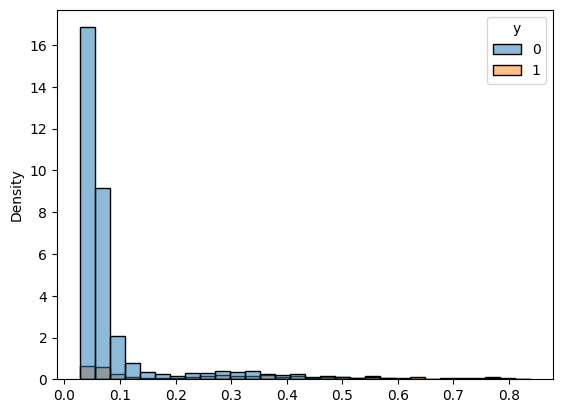

In [95]:
sns.histplot(x=y_test_pred, hue=y_test, bins=30, stat='density')
plt.show()

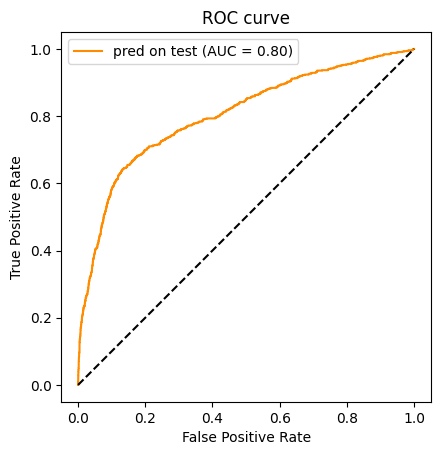

In [96]:
RocCurveDisplay.from_predictions(y_test, y_test_pred, name='pred on test', color='darkorange',)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [97]:
# 説明器の準備～SHAP値算出
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

# もとのデータセットと同じサイズの行列が得られる
print(X_test.shape)
print(shap_values.shape)

(6749, 33)
(6749, 33)


In [98]:
print(shap_values)

.values =
array([[-6.44582285e-03,  5.79701818e-02,  2.26885594e-01, ...,
        -4.74778909e-03, -1.06109514e-01, -1.50430589e-01],
       [-2.96370106e-02,  6.62471271e-04, -1.30171447e-01, ...,
        -6.54388194e-03,  8.44166755e-03, -2.69263487e-02],
       [-9.64789475e-02, -4.55744939e-01,  1.02798432e-01, ...,
        -6.84028759e-03, -2.11333967e-02, -6.43238191e-02],
       ...,
       [-1.66497425e-01,  2.87417834e-02,  1.42812216e-01, ...,
        -1.66136854e-02, -1.04436079e-01, -7.29329786e-02],
       [ 1.08277846e-02,  2.95302624e-02, -2.53379063e-02, ...,
        -4.73563842e-03,  1.25615813e-02, -3.27090702e-02],
       [ 8.51910035e-03,  3.11256827e-02,  2.07060573e-01, ...,
        -5.16587251e-03, -3.41148219e-02,  7.89465500e-01]])

.base_values =
array([-2.47472865, -2.47472865, -2.47472865, ..., -2.47472865,
       -2.47472865, -2.47472865])

.data =
array([[51. ,  2. , -2.9, ...,  0. ,  0. ,  0. ],
       [41. ,  1. ,  1.1, ...,  0. ,  1. ,  0. ],
       [39

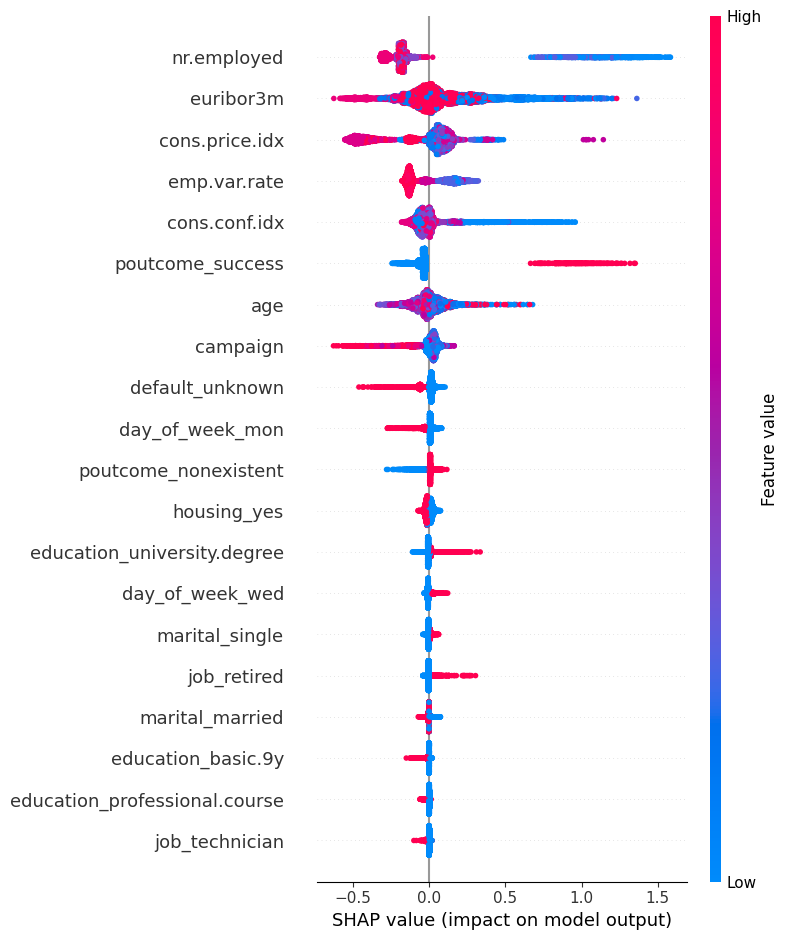

In [99]:
shap.summary_plot(shap_values, X_test)

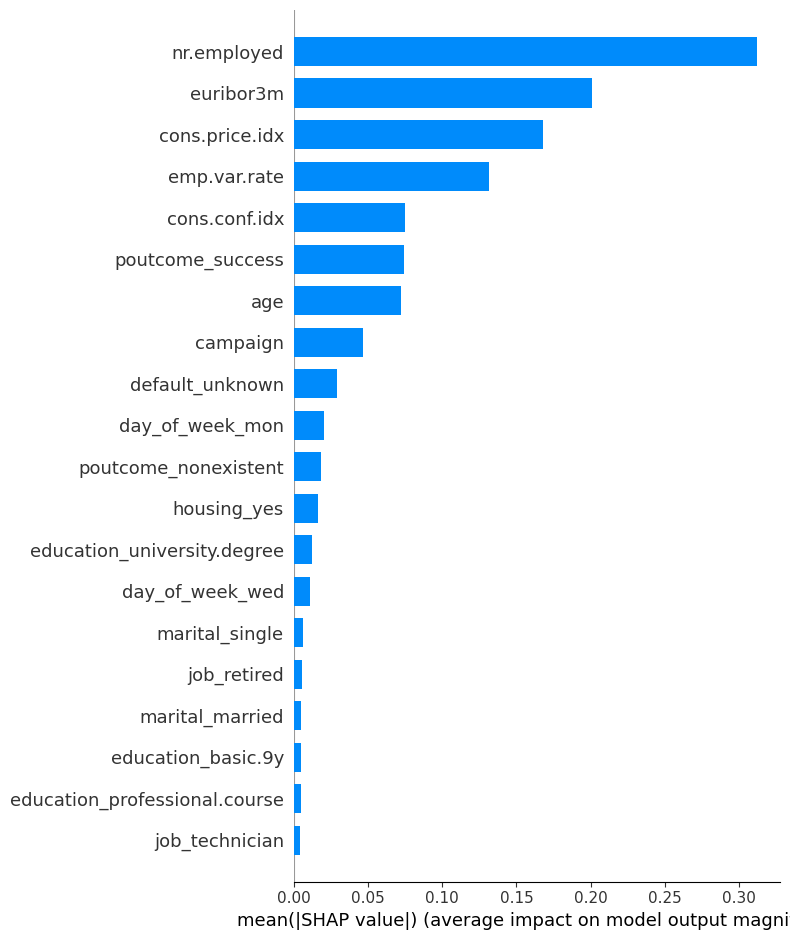

In [100]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [101]:
# 【参考】waterfall_plotのf(x)がSHAP値を表す
fx = shap_values[idx].values.sum() + shap_values[idx].base_values
print(f'f(x) = {fx}')

# f(x)の値をシグモイド関数で変換したものが予測値
print(f'予測値（SHAP値から計算）: {1 / (1 + np.exp(-fx))}')

# モデルが出力した予測値と一致することがわかる
print(f'予測値（モデルから取得）: {y_test_pred[idx]}')

f(x) = -0.7272051661084082
予測値（SHAP値から計算）: 0.3258083338565105
予測値（モデルから取得）: 0.3258083338565106


In [104]:
y_new_pred = model.predict(X_new, num_iteration=model.best_iteration)

In [105]:
submission = pd.DataFrame({'user_id': test_data_encoded['user_id'], 'y': y_new_pred})
submission.head()

,user_id,y
0,33744,0.091654
1,33745,0.094616
2,33746,0.109909
3,33747,0.085149
4,33748,0.091654


In [109]:
from datetime import datetime

# 保存先ディレクトリの確認と作成
output_dir = "submission"
os.makedirs(output_dir, exist_ok=True)  # ディレクトリがなければ作成

# 日付入りのファイル名を生成
date_str = datetime.now().strftime('%Y%m%d')
file_name = f'submission_lgb_{date_str}.csv'

# ファイルを保存
submission.to_csv(f'{output_dir}/{file_name}', index=False)

print(f"File saved as: {output_dir}/{file_name}")

File saved as: submission/submission_lgb_20250124.csv
